# Data wrangling: pollution in one state
Plan to explore a single state and then venture out to work on regions
# Importing libraries

In [198]:
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import os
import matplotlib.pyplot as plt
import klib

from IPython.core.display import display

# pd.set_option('max_columns', None)
# pd.reset_optio('max_rows')
#np.set_printoptions(threshold=sys.maxsize)

plt.style.use('dark_background')
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
sns.set(style='ticks', context='talk')

#Load data

In [199]:
daily_aqi_by_county_2017 = pd.read_csv('../../data/raw/daily_aqi_by_county_2017.csv', encoding='latin-1')
daily_aqi_by_county_2018 = pd.read_csv('../../data/raw/daily_aqi_by_county_2018.csv')
daily_aqi_by_county_2019 = pd.read_csv('../../data/raw/daily_aqi_by_county_2019.csv')

annual_income_by_county = pd.read_csv('../../data/raw/CAINC1__ALL_AREAS_1969_2019.csv', encoding='latin-1')

county_demographic = pd.read_csv('../../data/raw/county_cc-est2019-alldata.csv', encoding='latin-1')


def remove_col(df, col_name):
    '''Returns a dataframe with removed column or columns from old dataframe'''
    new_df = df.copy()

    if(type(col_name) != str and len(col_name) > 1):
        for index in col_name:
            new_df = new_df.drop(str(index), axis=1)
    else:
        new_df = new_df.drop(str(col_name), axis=1)
    return new_df

# Explore and clean aqi by county dataset

In [200]:
# work with one state massachusetts 2019

print(daily_aqi_by_county_2019.columns)

print(daily_aqi_by_county_2017.loc[daily_aqi_by_county_2019['State Name'].str.startswith('Mass')])

mass19 = daily_aqi_by_county_2019['State Code'] == 25

print(daily_aqi_by_county_2019.loc[mass19])

mass19 = pd.DataFrame(daily_aqi_by_county_2019[mass19])
mass19.drop(['State Code', 'State Name'], axis=1, inplace=True)
mass19.head()

Index(['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI',
       'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting'],
      dtype='object')
           State Name county Name  State Code  County Code        Date  AQI  \
133919       Maryland  Washington          24           43  2017-03-26   33   
133920       Maryland  Washington          24           43  2017-03-27   34   
133921       Maryland  Washington          24           43  2017-03-28   55   
133922       Maryland  Washington          24           43  2017-03-29   41   
133923       Maryland  Washington          24           43  2017-03-30   37   
...               ...         ...         ...          ...         ...  ...   
138628  Massachusetts   Worcester          25           27  2017-04-09   47   
138629  Massachusetts   Worcester          25           27  2017-04-10   87   
138630  Massachusetts   Worcester          25           27  2017-04-11   97   
138631  Massa

,county Name,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
133919,Barnstable,1,2019-01-01,33,Good,Ozone,25-001-0002,1
133920,Barnstable,1,2019-01-02,35,Good,Ozone,25-001-0002,1
133921,Barnstable,1,2019-01-03,36,Good,Ozone,25-001-0002,1
133922,Barnstable,1,2019-01-04,26,Good,Ozone,25-001-0002,1
133923,Barnstable,1,2019-01-05,37,Good,Ozone,25-001-0002,1


       County Code          AQI  Number of Sites Reporting
count  4714.000000  4714.000000                4714.000000
mean     13.645736    38.623250                   1.677980
std       8.242896    10.589007                   0.732266
min       1.000000     2.000000                   1.000000
25%       7.000000    32.000000                   1.000000
50%      13.000000    38.000000                   2.000000
75%      21.000000    44.000000                   2.000000
max      27.000000   126.000000                   3.000000


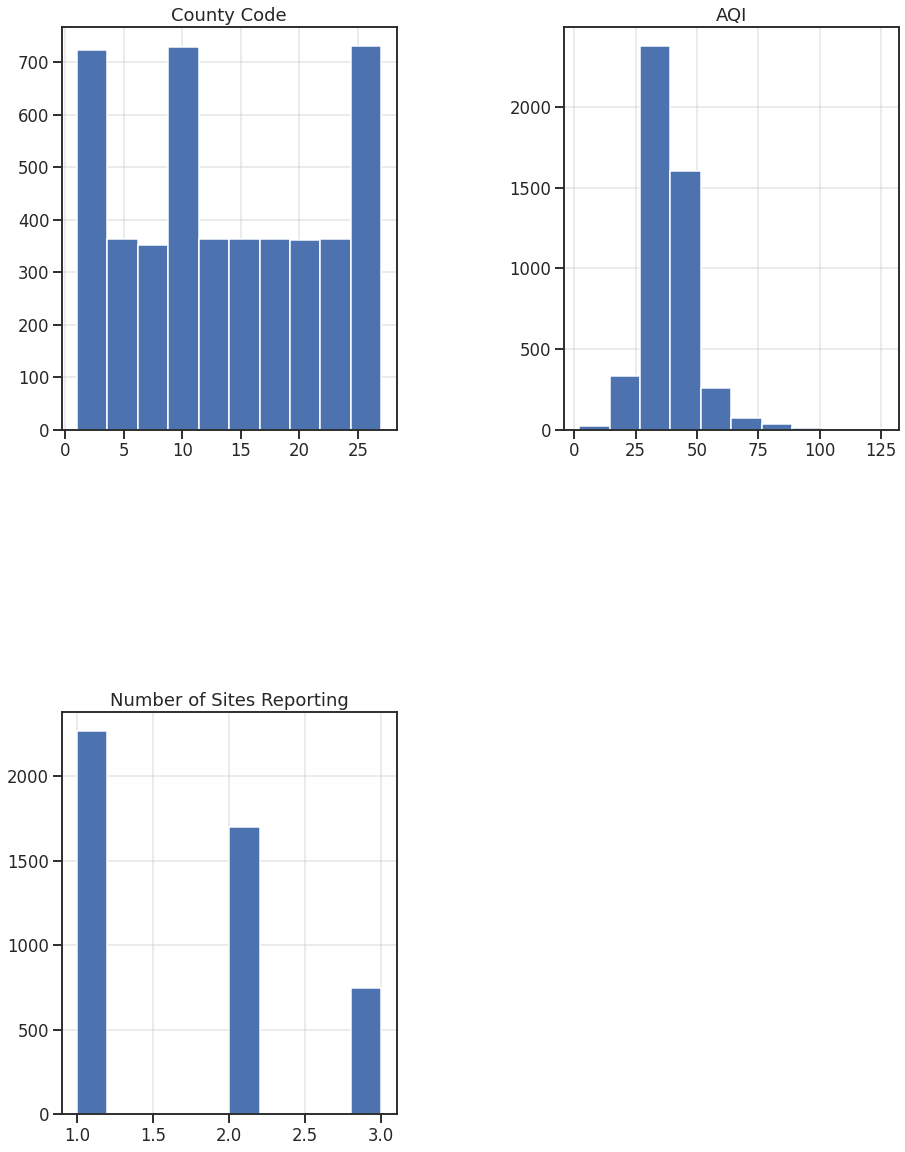

In [201]:
# klib.dist_plot(mass19)

print(mass19.describe())

mass19.hist(figsize=(15,20))
plt.subplots_adjust(hspace=0.7, wspace=0.5)

<BarContainer object of 4714 artists>

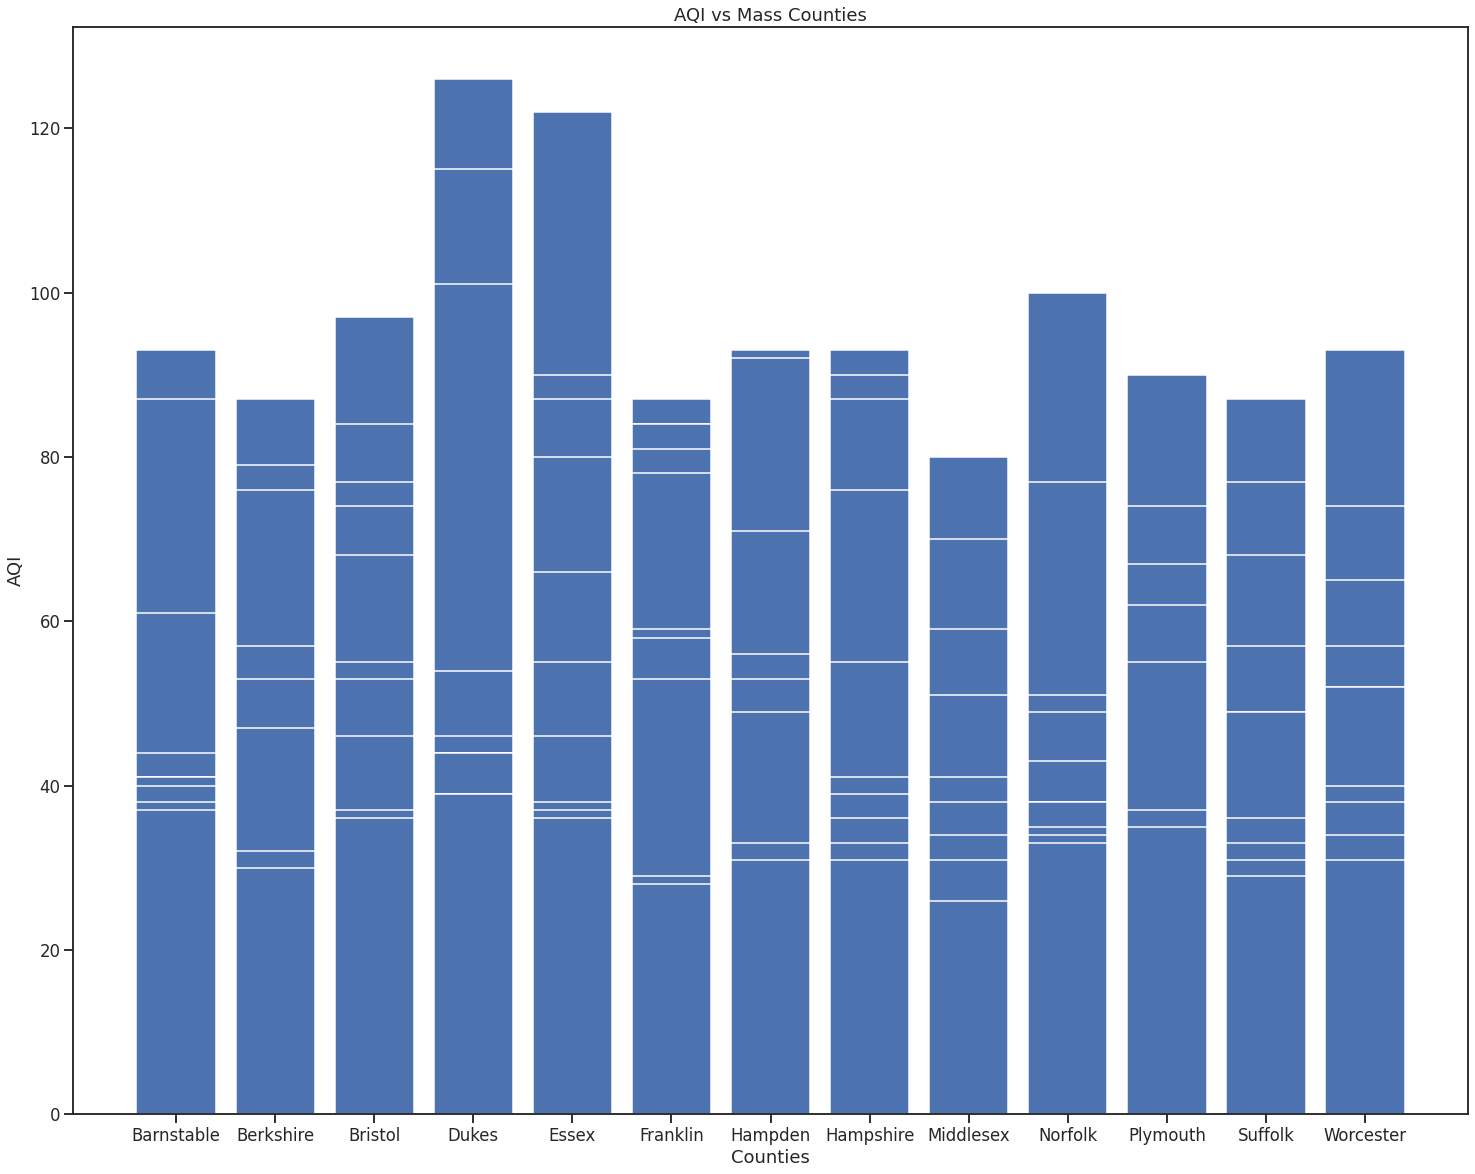

In [202]:
plt.subplots(figsize=(25,20))
plt.xlabel('Counties')
plt.ylabel('AQI')
plt.title('AQI vs Mass Counties')
plt.bar(mass19['county Name'], mass19['AQI'])

AQI follows a relative normal distro
no concerning outliers
no negative values

<BarContainer object of 13 artists>

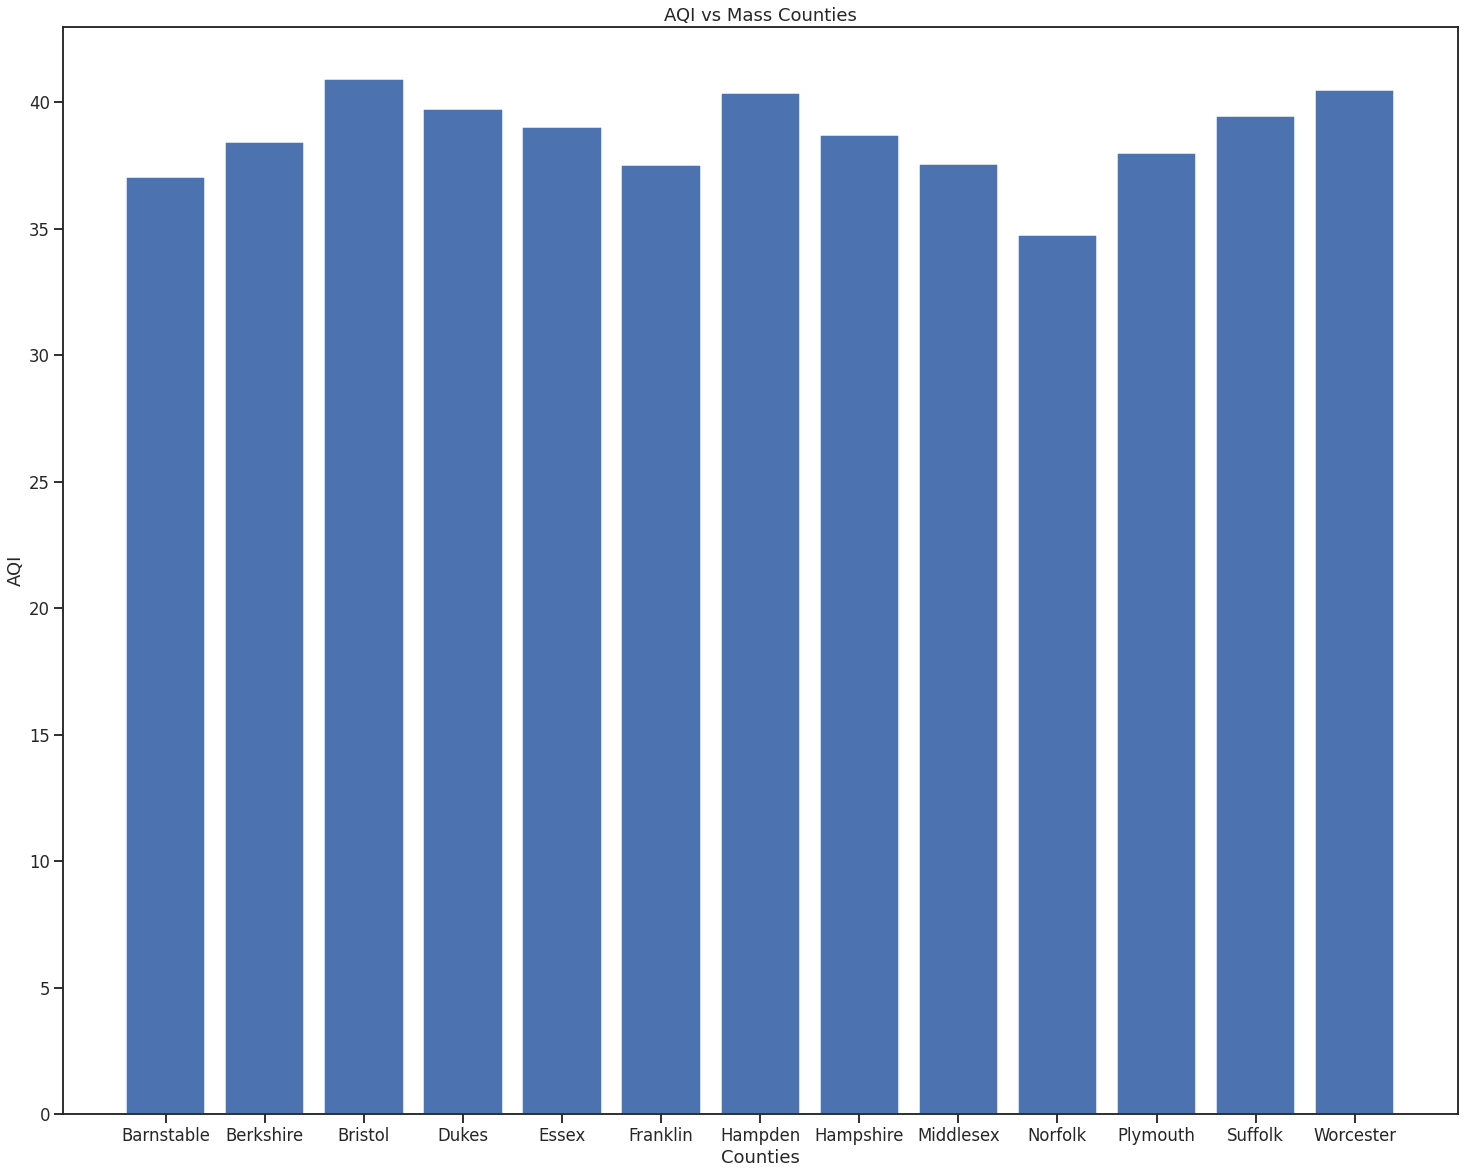

In [203]:
# bar plot of average aqi by county

mean_mass_AQI = mass19.groupby('county Name')[['AQI']].mean()
plt.subplots(figsize=(25,20))
plt.xlabel('Counties')
plt.ylabel('AQI')
plt.title('AQI vs Mass Counties')
plt.bar(mean_mass_AQI.index, mean_mass_AQI['AQI'])

In [204]:
# check for missing data in mass19

mass19.isna().sum()

county Name                  0
County Code                  0
Date                         0
AQI                          0
Category                     0
Defining Parameter           0
Defining Site                0
Number of Sites Reporting    0
dtype: int64

In [205]:
max = mass19.AQI == mass19.AQI.max()
min = mass19.AQI == mass19.AQI.min()
display(mass19.loc[max | min])

# check what are the defining parameters
mass19['Defining Parameter'].unique()

,county Name,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
135195,Dukes,7,2019-07-20,126,Unhealthy for Sensitive Groups,Ozone,25-007-0001,1
138206,Suffolk,25,2019-10-31,2,Good,CO,25-025-0042,1


array(['Ozone', 'PM2.5', 'NO2', 'CO'], dtype=object)

# Explore and clean income by county data set 2019


In [206]:
print(annual_income_by_county.columns)
dropcol = ['IndustryClassification', 'Description', 'Unit', 'TableName']

county_income_2017_2019 = remove_col(annual_income_by_county, range(1969, 2017))
county_income_2017_2019 = remove_col(county_income_2017_2019, dropcol)
county_income_2017_2019.columns

county_income_2017_2019.drop(county_income_2017_2019.tail(4).index, inplace=True)
county_income_2017_2019
# use to remove years that we are not interested in
# also remove last 4 rows which were not row data
# 1 is personal income, 2 is population of county, 3 per capital income

Index(['GeoFIPS', 'GeoName', 'Region', 'TableName', 'LineCode',
       'IndustryClassification', 'Description', 'Unit', '1969', '1970', '1971',
       '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019'],
      dtype='object')


,GeoFIPS,GeoName,Region,LineCode,2017,2018,2019
0,"""00000""",United States,,1.0,16937582000,17839255000,18542262000
1,"""00000""",United States,,2.0,324985539,326687501,328239523
2,"""00000""",United States,,3.0,52118,54606,56490
3,"""01000""",Alabama,5,1.0,199999756,208752683,216449038
4,"""01000""",Alabama,5,2.0,4874486,4887681,4903185
...,...,...,...,...,...,...,...
9589,"""97000""",Rocky Mountain,7,2.0,12062055,12233639,12399296
9590,"""97000""",Rocky Mountain,7,3.0,49991,52936,54873
9591,"""98000""",Far West,8,1.0,3279057722,3472097346,3634009401
9592,"""98000""",Far West,8,2.0,56059482,56350416,56572426


In [207]:
# change income values to float
county_income_2017_2019['2017'] = pd.to_numeric(county_income_2017_2019['2017'], downcast='float', errors='coerce')
county_income_2017_2019['2018'] =pd.to_numeric(county_income_2017_2019['2018'], downcast='float', errors='coerce')
county_income_2017_2019['2019'] =pd.to_numeric(county_income_2017_2019['2019'], downcast='float', errors='coerce')

county_income_2017_2019.dtypes

GeoFIPS      object
GeoName      object
Region       object
LineCode    float64
2017        float32
2018        float32
2019        float32
dtype: object

In [208]:
print(county_income_2017_2019.columns)
county_income_2017_2019

# get rid of " and space char in GeoFIPS
county_income_2017_2019['GeoFIPS'].replace(r'[" ]', '', regex=True, inplace=True)

county_income_2017_2019

Index(['GeoFIPS', 'GeoName', 'Region', 'LineCode', '2017', '2018', '2019'], dtype='object')


,GeoFIPS,GeoName,Region,LineCode,2017,2018,2019
0,00000,United States,,1.0,1.693758e+10,1.783926e+10,1.854226e+10
1,00000,United States,,2.0,3.249855e+08,3.266875e+08,3.282395e+08
2,00000,United States,,3.0,5.211800e+04,5.460600e+04,5.649000e+04
3,01000,Alabama,5,1.0,1.999998e+08,2.087527e+08,2.164490e+08
4,01000,Alabama,5,2.0,4.874486e+06,4.887681e+06,4.903185e+06
...,...,...,...,...,...,...,...
9589,97000,Rocky Mountain,7,2.0,1.206206e+07,1.223364e+07,1.239930e+07
9590,97000,Rocky Mountain,7,3.0,4.999100e+04,5.293600e+04,5.487300e+04
9591,98000,Far West,8,1.0,3.279058e+09,3.472097e+09,3.634009e+09
9592,98000,Far West,8,2.0,5.605948e+07,5.635042e+07,5.657242e+07


In [209]:
# find all Mass values
mass = county_income_2017_2019.GeoFIPS.str.startswith('25')
county_mass_incomes = county_income_2017_2019.loc[mass]

# remove the total mass stats
county_mass_incomes.drop(county_mass_incomes.head(3).index, inplace=True)
county_mass_incomes
# mass

/home/wkc/.local/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,GeoFIPS,GeoName,Region,LineCode,2017,2018,2019
3789,25001,"Barnstable, MA",1,1.0,15181333.0,15949290.0,16492955.0
3790,25001,"Barnstable, MA",1,2.0,213581.0,213471.0,212990.0
3791,25001,"Barnstable, MA",1,3.0,71080.0,74714.0,77435.0
3792,25003,"Berkshire, MA",1,1.0,6873118.0,7132374.0,7284151.0
3793,25003,"Berkshire, MA",1,2.0,126353.0,125901.0,124944.0
3794,25003,"Berkshire, MA",1,3.0,54396.0,56651.0,58299.0
3795,25005,"Bristol, MA",1,1.0,29045780.0,30377836.0,31492832.0
3796,25005,"Bristol, MA",1,2.0,560941.0,564092.0,565217.0
3797,25005,"Bristol, MA",1,3.0,51780.0,53853.0,55718.0
3798,25007,"Dukes, MA",1,1.0,1551092.0,1692326.0,1750465.0


In [210]:
county_mass_incomes.shape
# small distribution of incomes for mass and counties

(42, 7)

In [211]:
# separate personal income, pop. and per capita income
mass_personal_inc = county_mass_incomes.loc[county_mass_incomes.LineCode == 1.0]
mass_pop = county_mass_incomes.loc[county_mass_incomes.LineCode == 2.0]
mass_per_capita = county_mass_incomes.loc[county_mass_incomes.LineCode == 3.0]

# Examine distributions for outliers, also check for missing values


GeoFIPS     0
GeoName     0
Region      0
LineCode    0
2017        0
2018        0
2019        0
dtype: int64


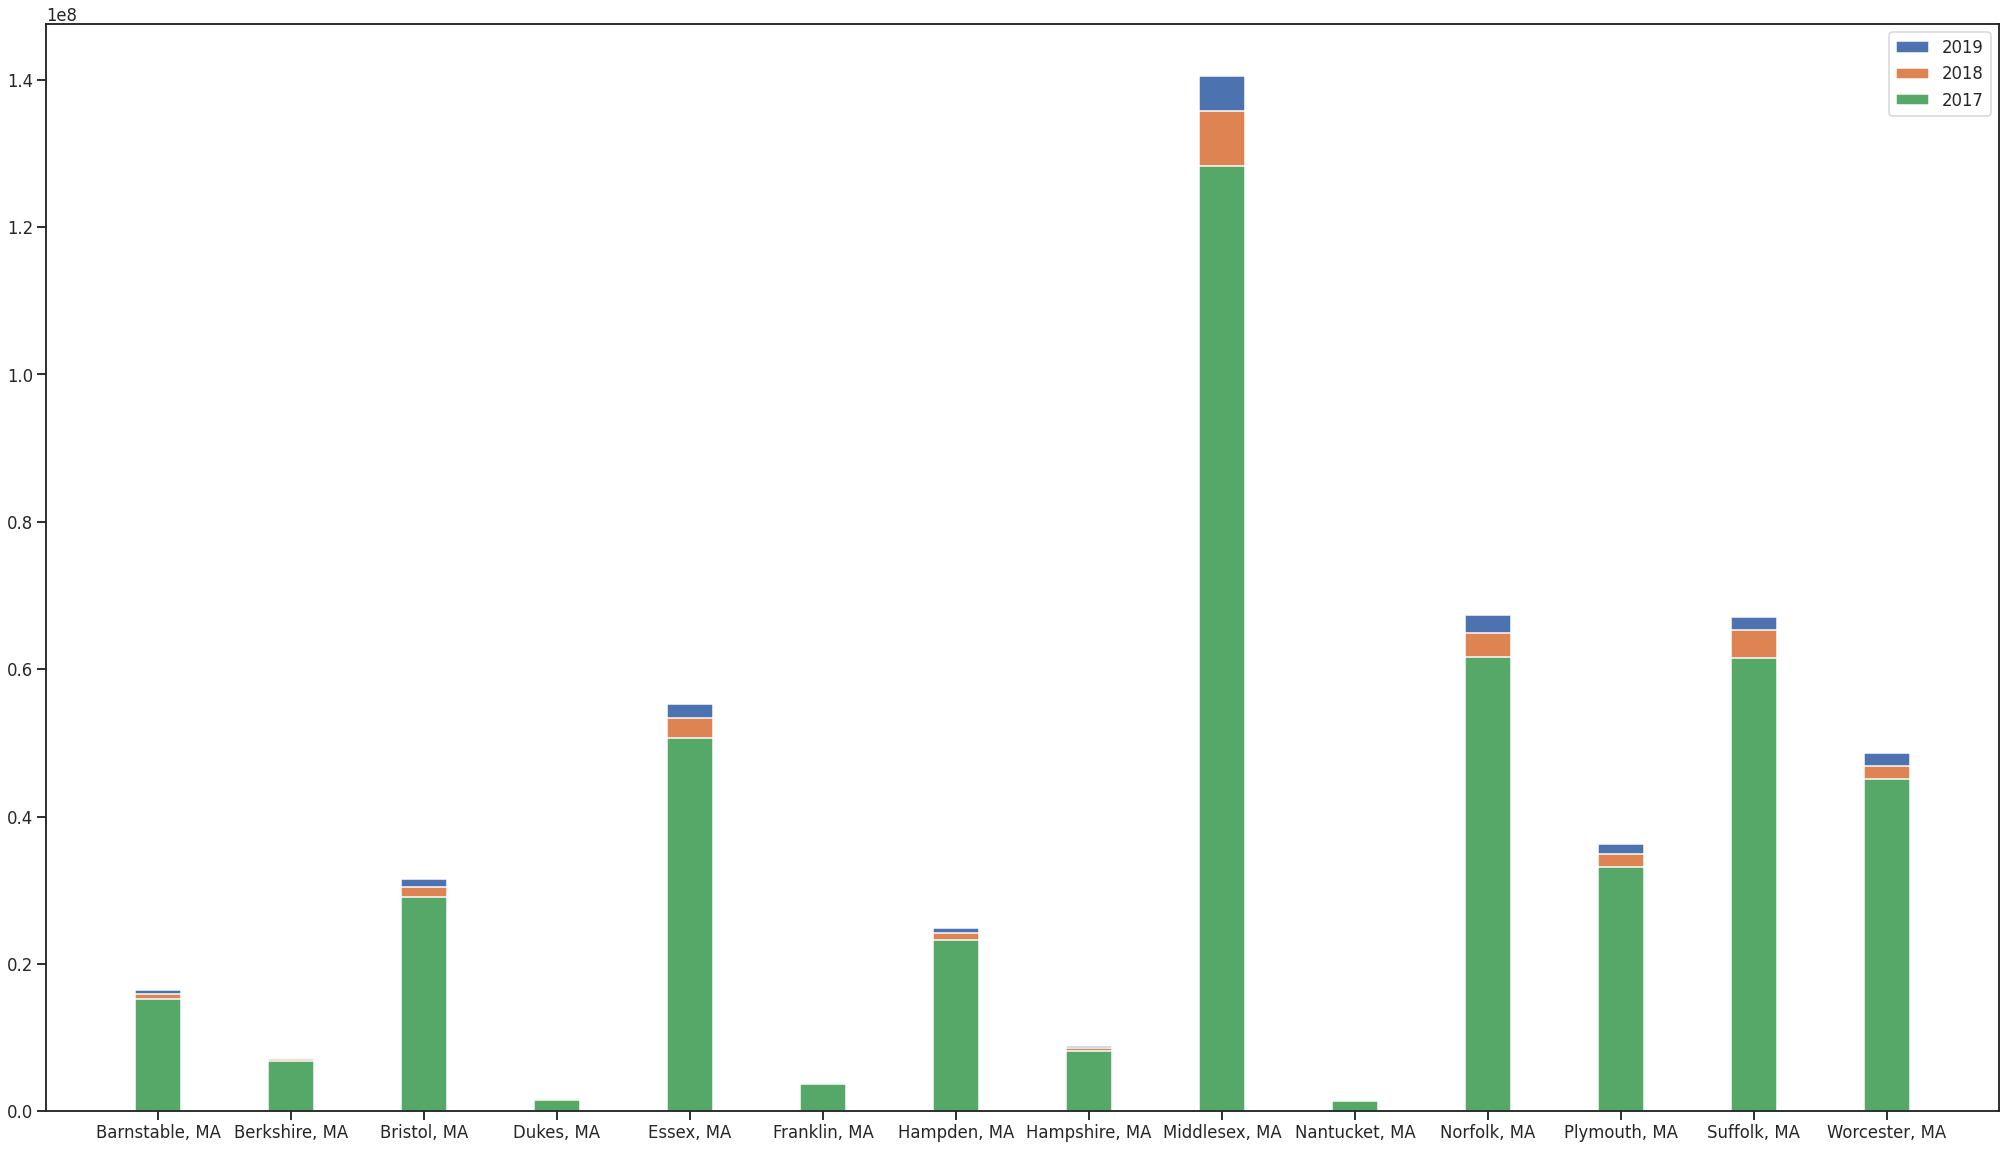

In [212]:
# distribution of personal incomes in mass
print(county_mass_incomes.isnull().sum())
width = 0.35 # the width of the bars
fig, ax = plt.subplots(figsize=(35,20))

recs1 = ax.bar(mass_personal_inc.GeoName, mass_personal_inc['2019'], width, label='2019')
recs2 = ax.bar(mass_personal_inc.GeoName, mass_personal_inc['2018'], width, label='2018')
recs3 = ax.bar(mass_personal_inc.GeoName, mass_personal_inc['2017'], width, label='2017')

ax.legend()
plt.show()
# surprised that middlesex makes more than suffolk county for personal income


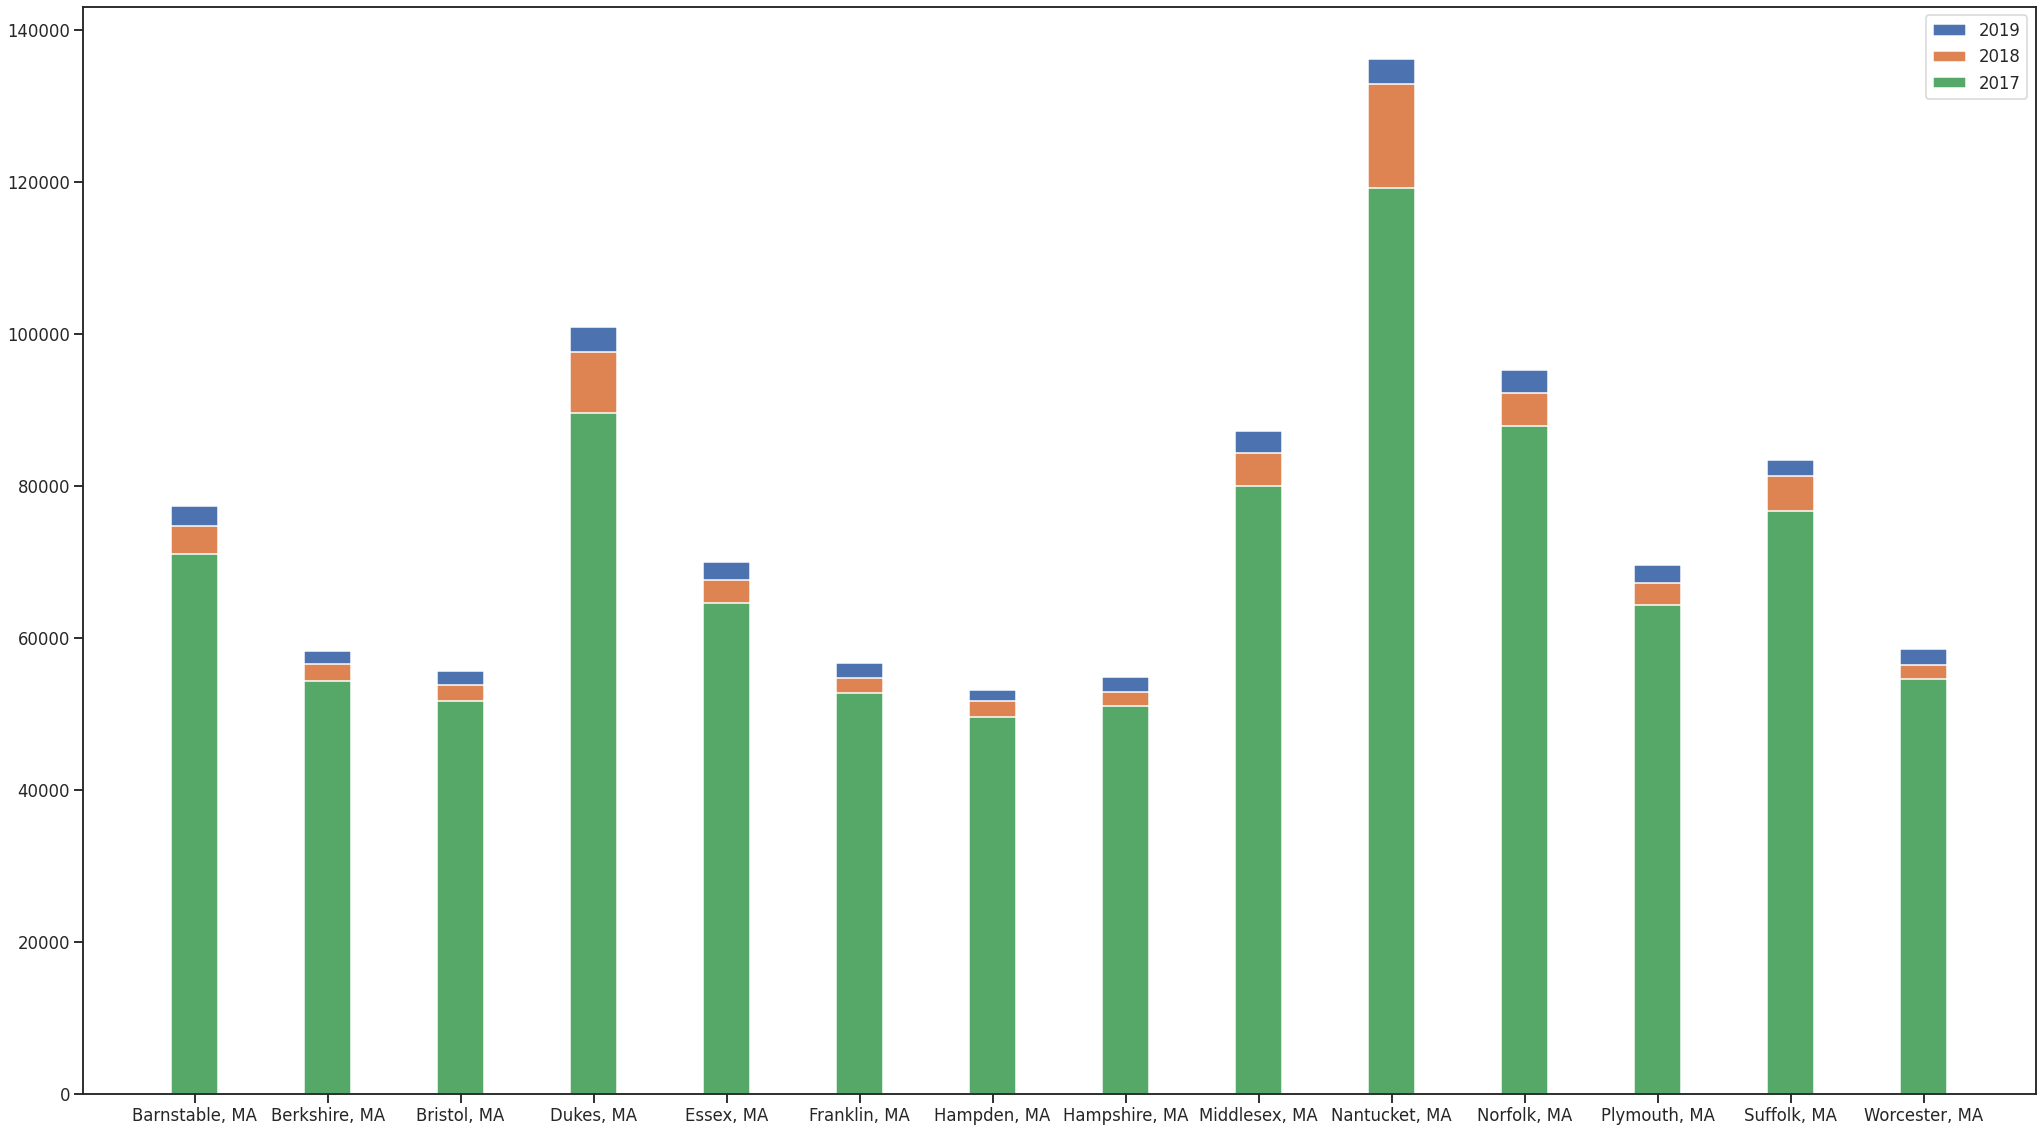

In [213]:
width = 0.35 # the width of the bars
fig, ax = plt.subplots(figsize=(35,20))

recs1 = ax.bar(mass_per_capita.GeoName, mass_per_capita['2019'], width, label='2019')
recs2 = ax.bar(mass_per_capita.GeoName, mass_per_capita['2018'], width, label='2018')
recs3 = ax.bar(mass_per_capita.GeoName, mass_per_capita['2017'], width, label='2017')

ax.legend()
plt.show()
# when looking at per capita of pop of county; it appears that nantucket has highest personal income

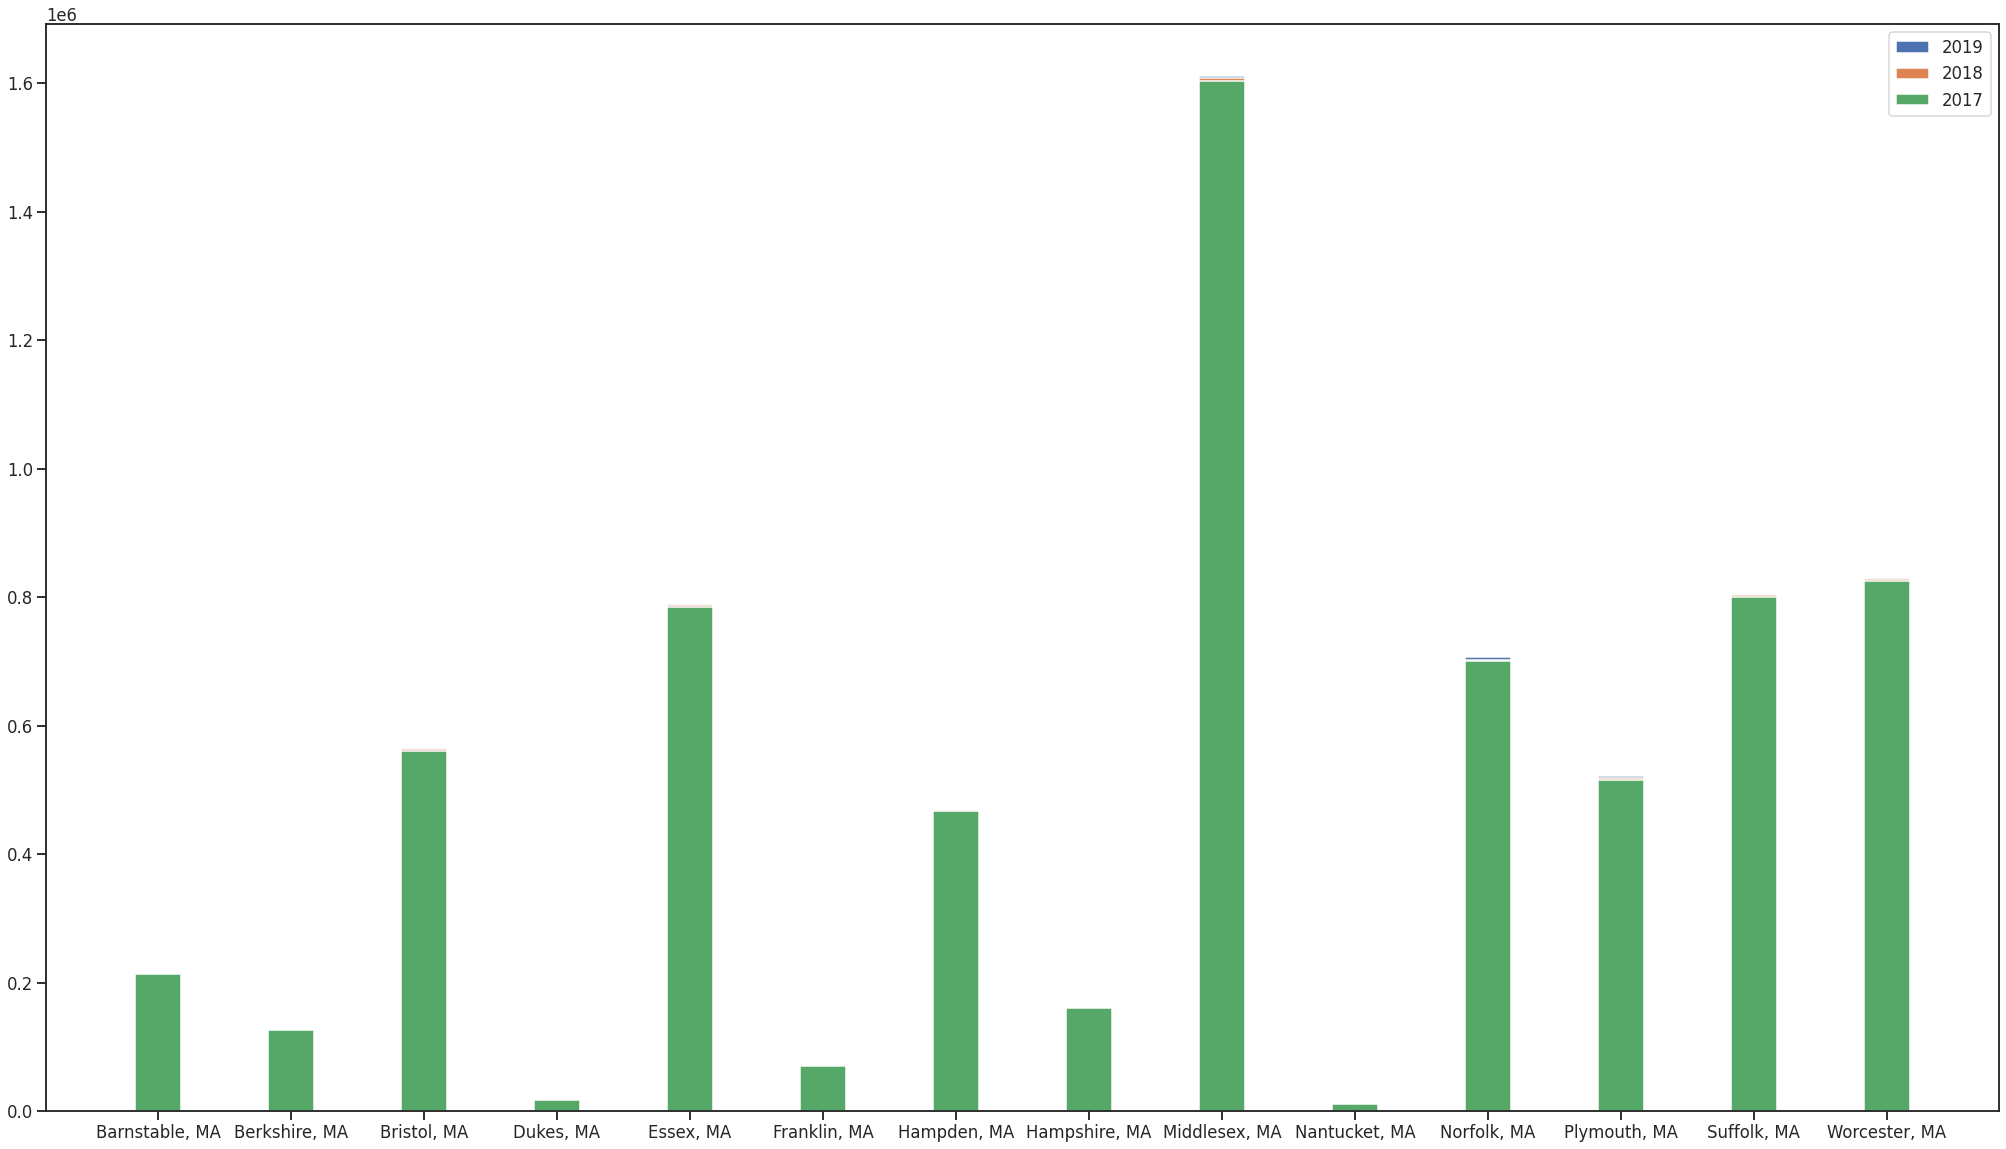

In [214]:
width = 0.35 # the width of the bars
fig, ax = plt.subplots(figsize=(35,20))

recs1 = ax.bar(mass_pop.GeoName, mass_pop['2019'], width, label='2019')
recs2 = ax.bar(mass_pop.GeoName, mass_pop['2018'], width, label='2018')
recs3 = ax.bar(mass_pop.GeoName, mass_pop['2017'], width, label='2017')

ax.legend()
plt.show()

# middlesex has highest personal income since it has largest pop over other counties
# populaitons seem to not very much in past 3 years; makes sense

# Explore and clean demographic data set 2019

In [215]:
print(county_demographic.columns)
print(county_demographic.dtypes)
# seems demographic is all numeric type which is good

print(county_demographic.shape)
# we have 80 columns

county_demographic.head()
print(county_demographic.SUMLEV.unique())

mass_dem = county_demographic.loc[county_demographic.STATE == 25]
mass_dem

Index(['SUMLEV', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME', 'YEAR', 'AGEGRP',
       'TOT_POP', 'TOT_MALE', 'TOT_FEMALE', 'WA_MALE', 'WA_FEMALE', 'BA_MALE',
       'BA_FEMALE', 'IA_MALE', 'IA_FEMALE', 'AA_MALE', 'AA_FEMALE', 'NA_MALE',
       'NA_FEMALE', 'TOM_MALE', 'TOM_FEMALE', 'WAC_MALE', 'WAC_FEMALE',
       'BAC_MALE', 'BAC_FEMALE', 'IAC_MALE', 'IAC_FEMALE', 'AAC_MALE',
       'AAC_FEMALE', 'NAC_MALE', 'NAC_FEMALE', 'NH_MALE', 'NH_FEMALE',
       'NHWA_MALE', 'NHWA_FEMALE', 'NHBA_MALE', 'NHBA_FEMALE', 'NHIA_MALE',
       'NHIA_FEMALE', 'NHAA_MALE', 'NHAA_FEMALE', 'NHNA_MALE', 'NHNA_FEMALE',
       'NHTOM_MALE', 'NHTOM_FEMALE', 'NHWAC_MALE', 'NHWAC_FEMALE',
       'NHBAC_MALE', 'NHBAC_FEMALE', 'NHIAC_MALE', 'NHIAC_FEMALE',
       'NHAAC_MALE', 'NHAAC_FEMALE', 'NHNAC_MALE', 'NHNAC_FEMALE', 'H_MALE',
       'H_FEMALE', 'HWA_MALE', 'HWA_FEMALE', 'HBA_MALE', 'HBA_FEMALE',
       'HIA_MALE', 'HIA_FEMALE', 'HAA_MALE', 'HAA_FEMALE', 'HNA_MALE',
       'HNA_FEMALE', 'HTOM_MALE', 'HTOM_FEMALE

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
277476,50,25,1,Massachusetts,Barnstable County,1,0,215888,102854,113034,...,2105,1974,240,216,153,137,42,37,31,24
277477,50,25,1,Massachusetts,Barnstable County,1,1,8854,4465,4389,...,203,207,35,27,27,22,9,2,3,3
277478,50,25,1,Massachusetts,Barnstable County,1,2,9874,4958,4916,...,205,175,31,29,18,12,6,2,9,6
277479,50,25,1,Massachusetts,Barnstable County,1,3,11031,5696,5335,...,166,164,34,26,15,13,4,2,3,2
277480,50,25,1,Massachusetts,Barnstable County,1,4,12008,6417,5591,...,201,178,16,16,16,11,4,5,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280663,50,25,27,Massachusetts,Worcester County,12,14,44274,21387,22887,...,861,1083,118,153,43,24,7,13,2,11
280664,50,25,27,Massachusetts,Worcester County,12,15,34131,16141,17990,...,560,858,88,90,22,21,2,8,1,2
280665,50,25,27,Massachusetts,Worcester County,12,16,22869,10108,12761,...,374,533,48,70,8,18,2,6,3,2
280666,50,25,27,Massachusetts,Worcester County,12,17,14996,6133,8863,...,162,368,19,47,6,9,0,3,2,2


In [216]:
# keep only years 17-19

mass_dem = mass_dem.loc[mass_dem.YEAR > 9]
# keep only totals of dem; disregard ages
mass_dem = mass_dem.loc[mass_dem.AGEGRP == 0]
mass_dem

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
277647,50,25,1,Massachusetts,Barnstable County,10,0,213581,102148,111433,...,2876,2716,427,359,200,182,170,42,39,25
277666,50,25,1,Massachusetts,Barnstable County,11,0,213471,102032,111439,...,2987,2866,439,372,200,189,216,46,39,26
277685,50,25,1,Massachusetts,Barnstable County,12,0,212990,101791,111199,...,3089,2967,462,394,191,187,246,51,40,30
277875,50,25,3,Massachusetts,Berkshire County,10,0,126353,61023,65330,...,2632,2550,391,383,153,117,32,46,23,23
277894,50,25,3,Massachusetts,Berkshire County,11,0,125901,60824,65077,...,2787,2671,407,388,151,131,34,45,26,27
277913,50,25,3,Massachusetts,Berkshire County,12,0,124944,60406,64538,...,2905,2715,419,401,150,133,40,50,27,24
278103,50,25,5,Massachusetts,Bristol County,10,0,560941,271702,289239,...,18068,18075,3726,3768,1603,1242,304,288,273,245
278122,50,25,5,Massachusetts,Bristol County,11,0,564092,272979,291113,...,19046,19095,3961,3970,1616,1284,317,305,274,271
278141,50,25,5,Massachusetts,Bristol County,12,0,565217,273426,291791,...,19531,19629,4057,4071,1636,1326,342,311,291,284
278331,50,25,7,Massachusetts,Dukes County,10,0,17311,8487,8824,...,266,255,48,49,13,23,6,7,3,5


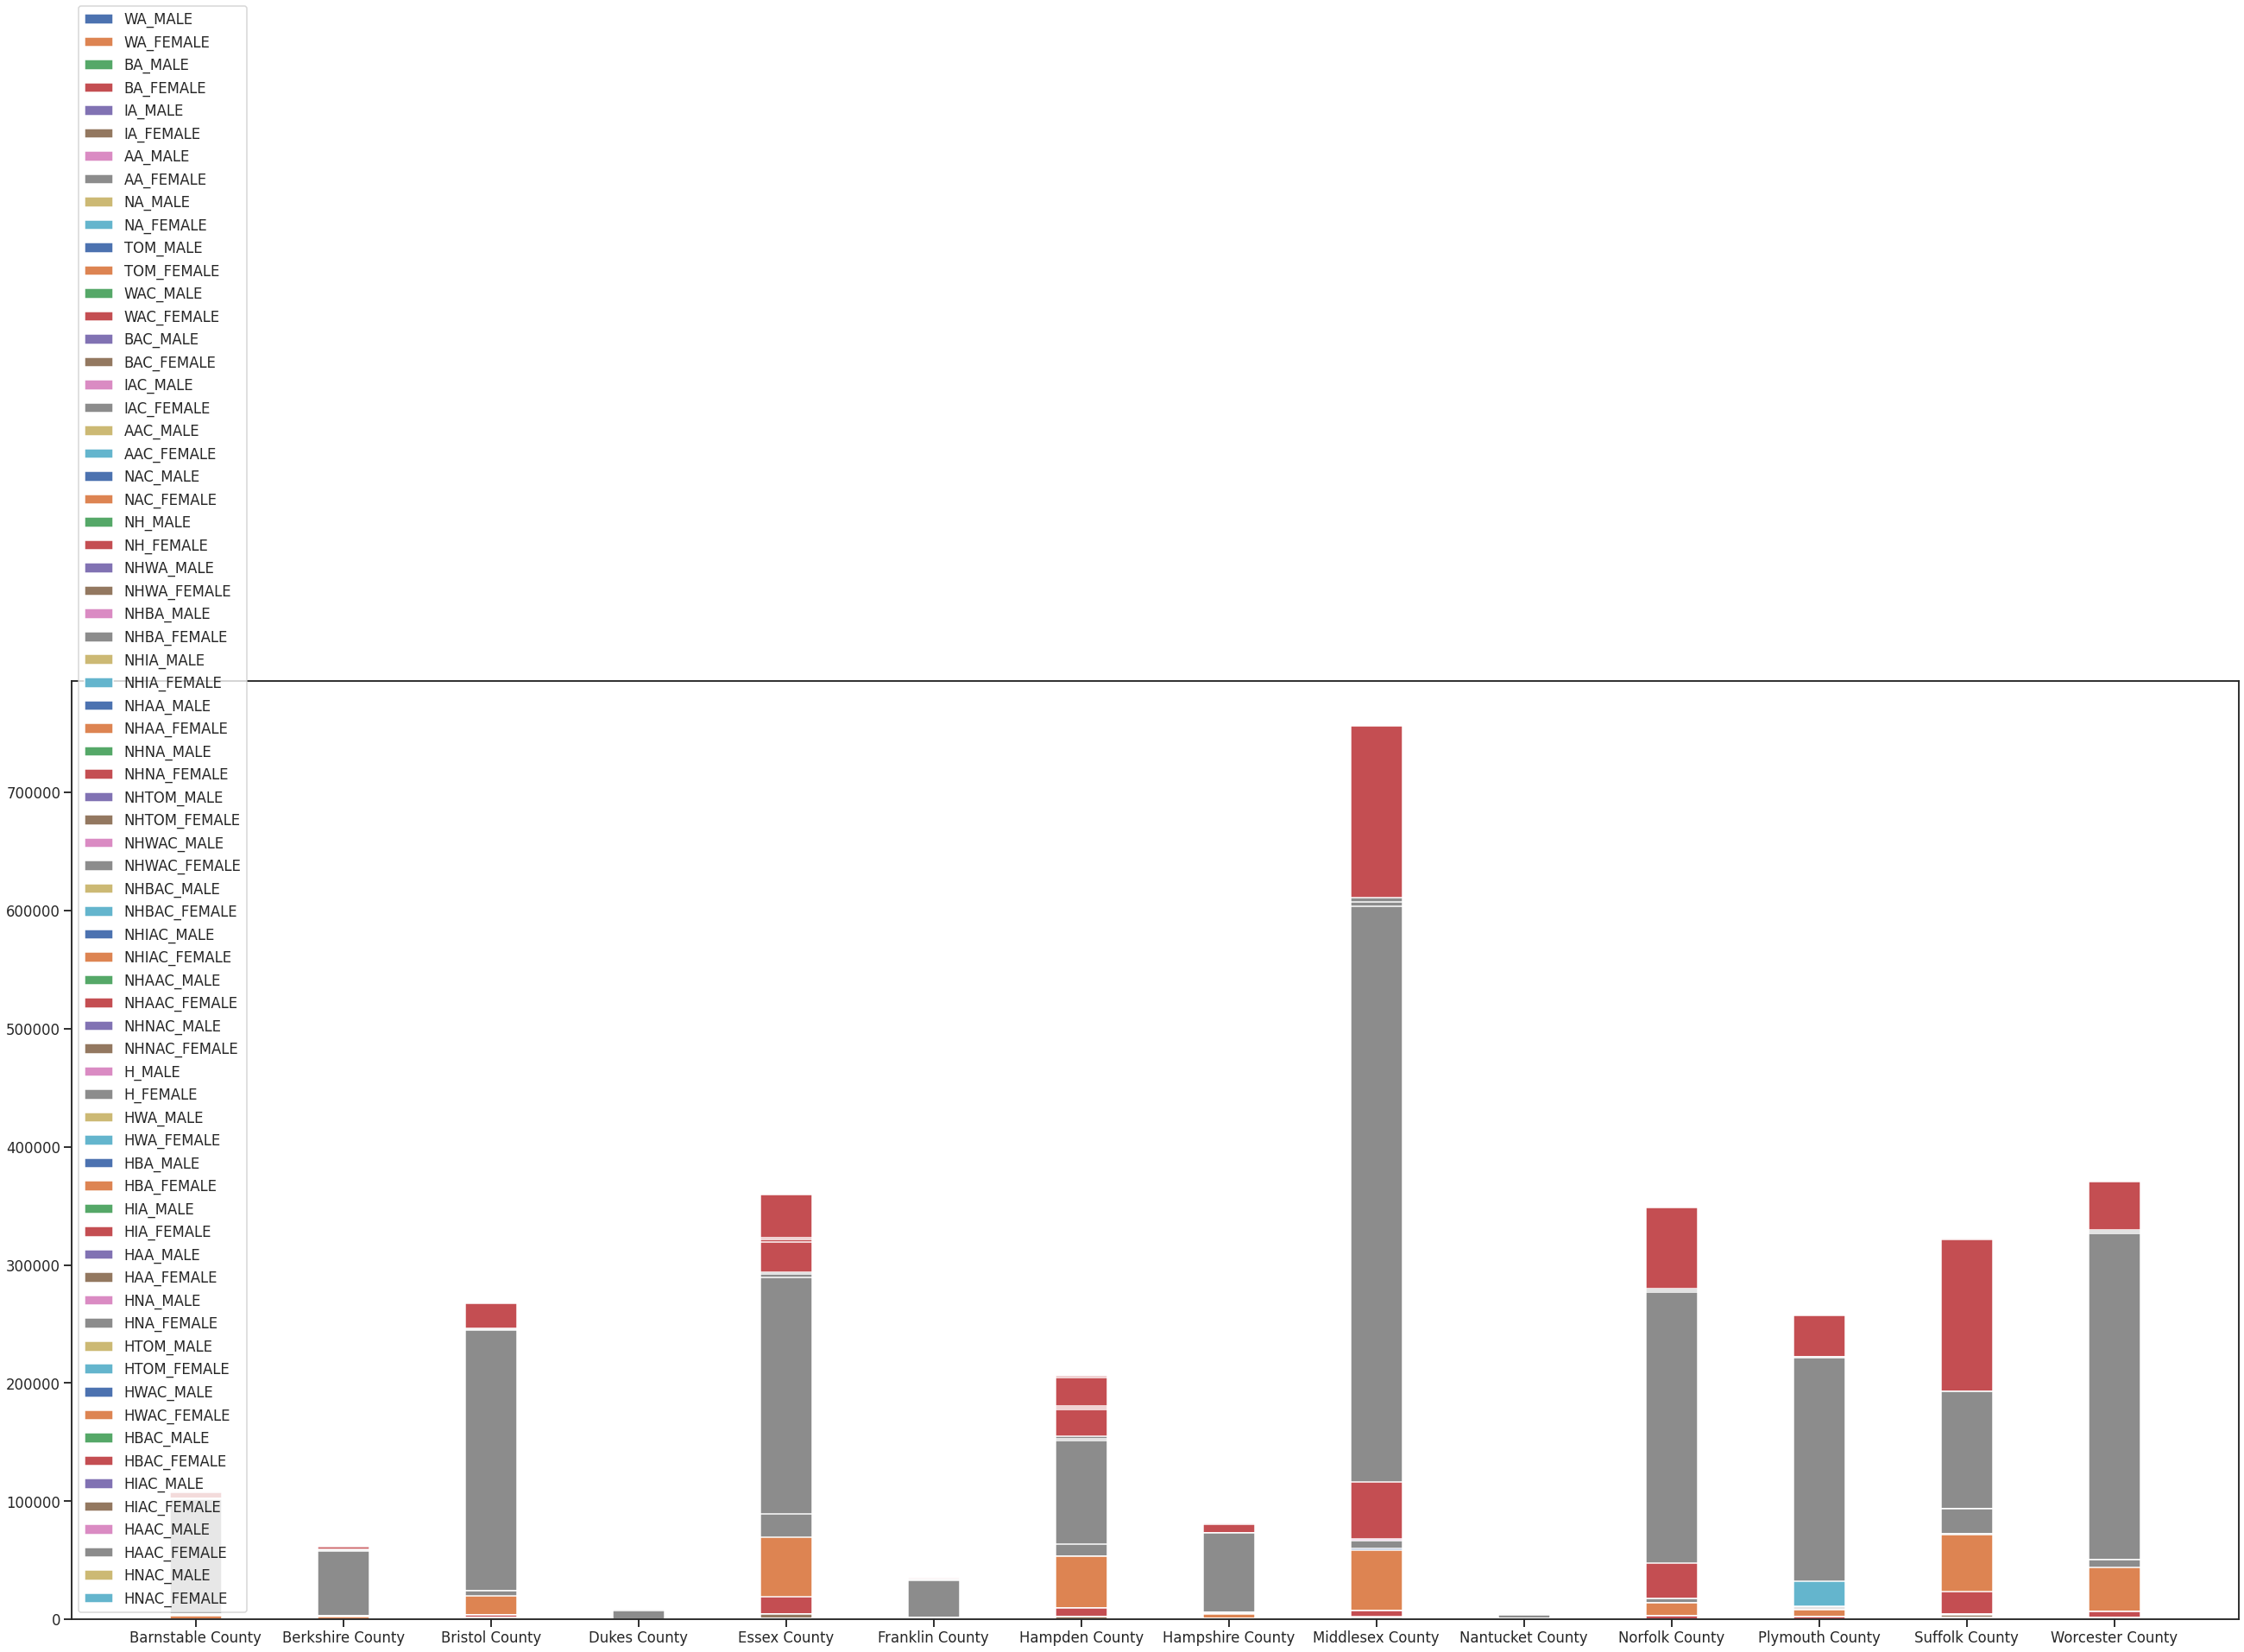

In [217]:
mass_dem.shape
ethn = mass_dem.columns.values[10:]

width = 0.35
fig, ax = plt.subplots(figsize=(45,20))

# rec1 = ax.bar(mass_dem.CTYNAME, mass_dem.loc[:,'TOT_POP'], width, label='tot pop')
for eth in ethn:
    ax.bar(mass_dem.CTYNAME, mass_dem[eth], width, label=eth)

ax.legend()
plt.show()

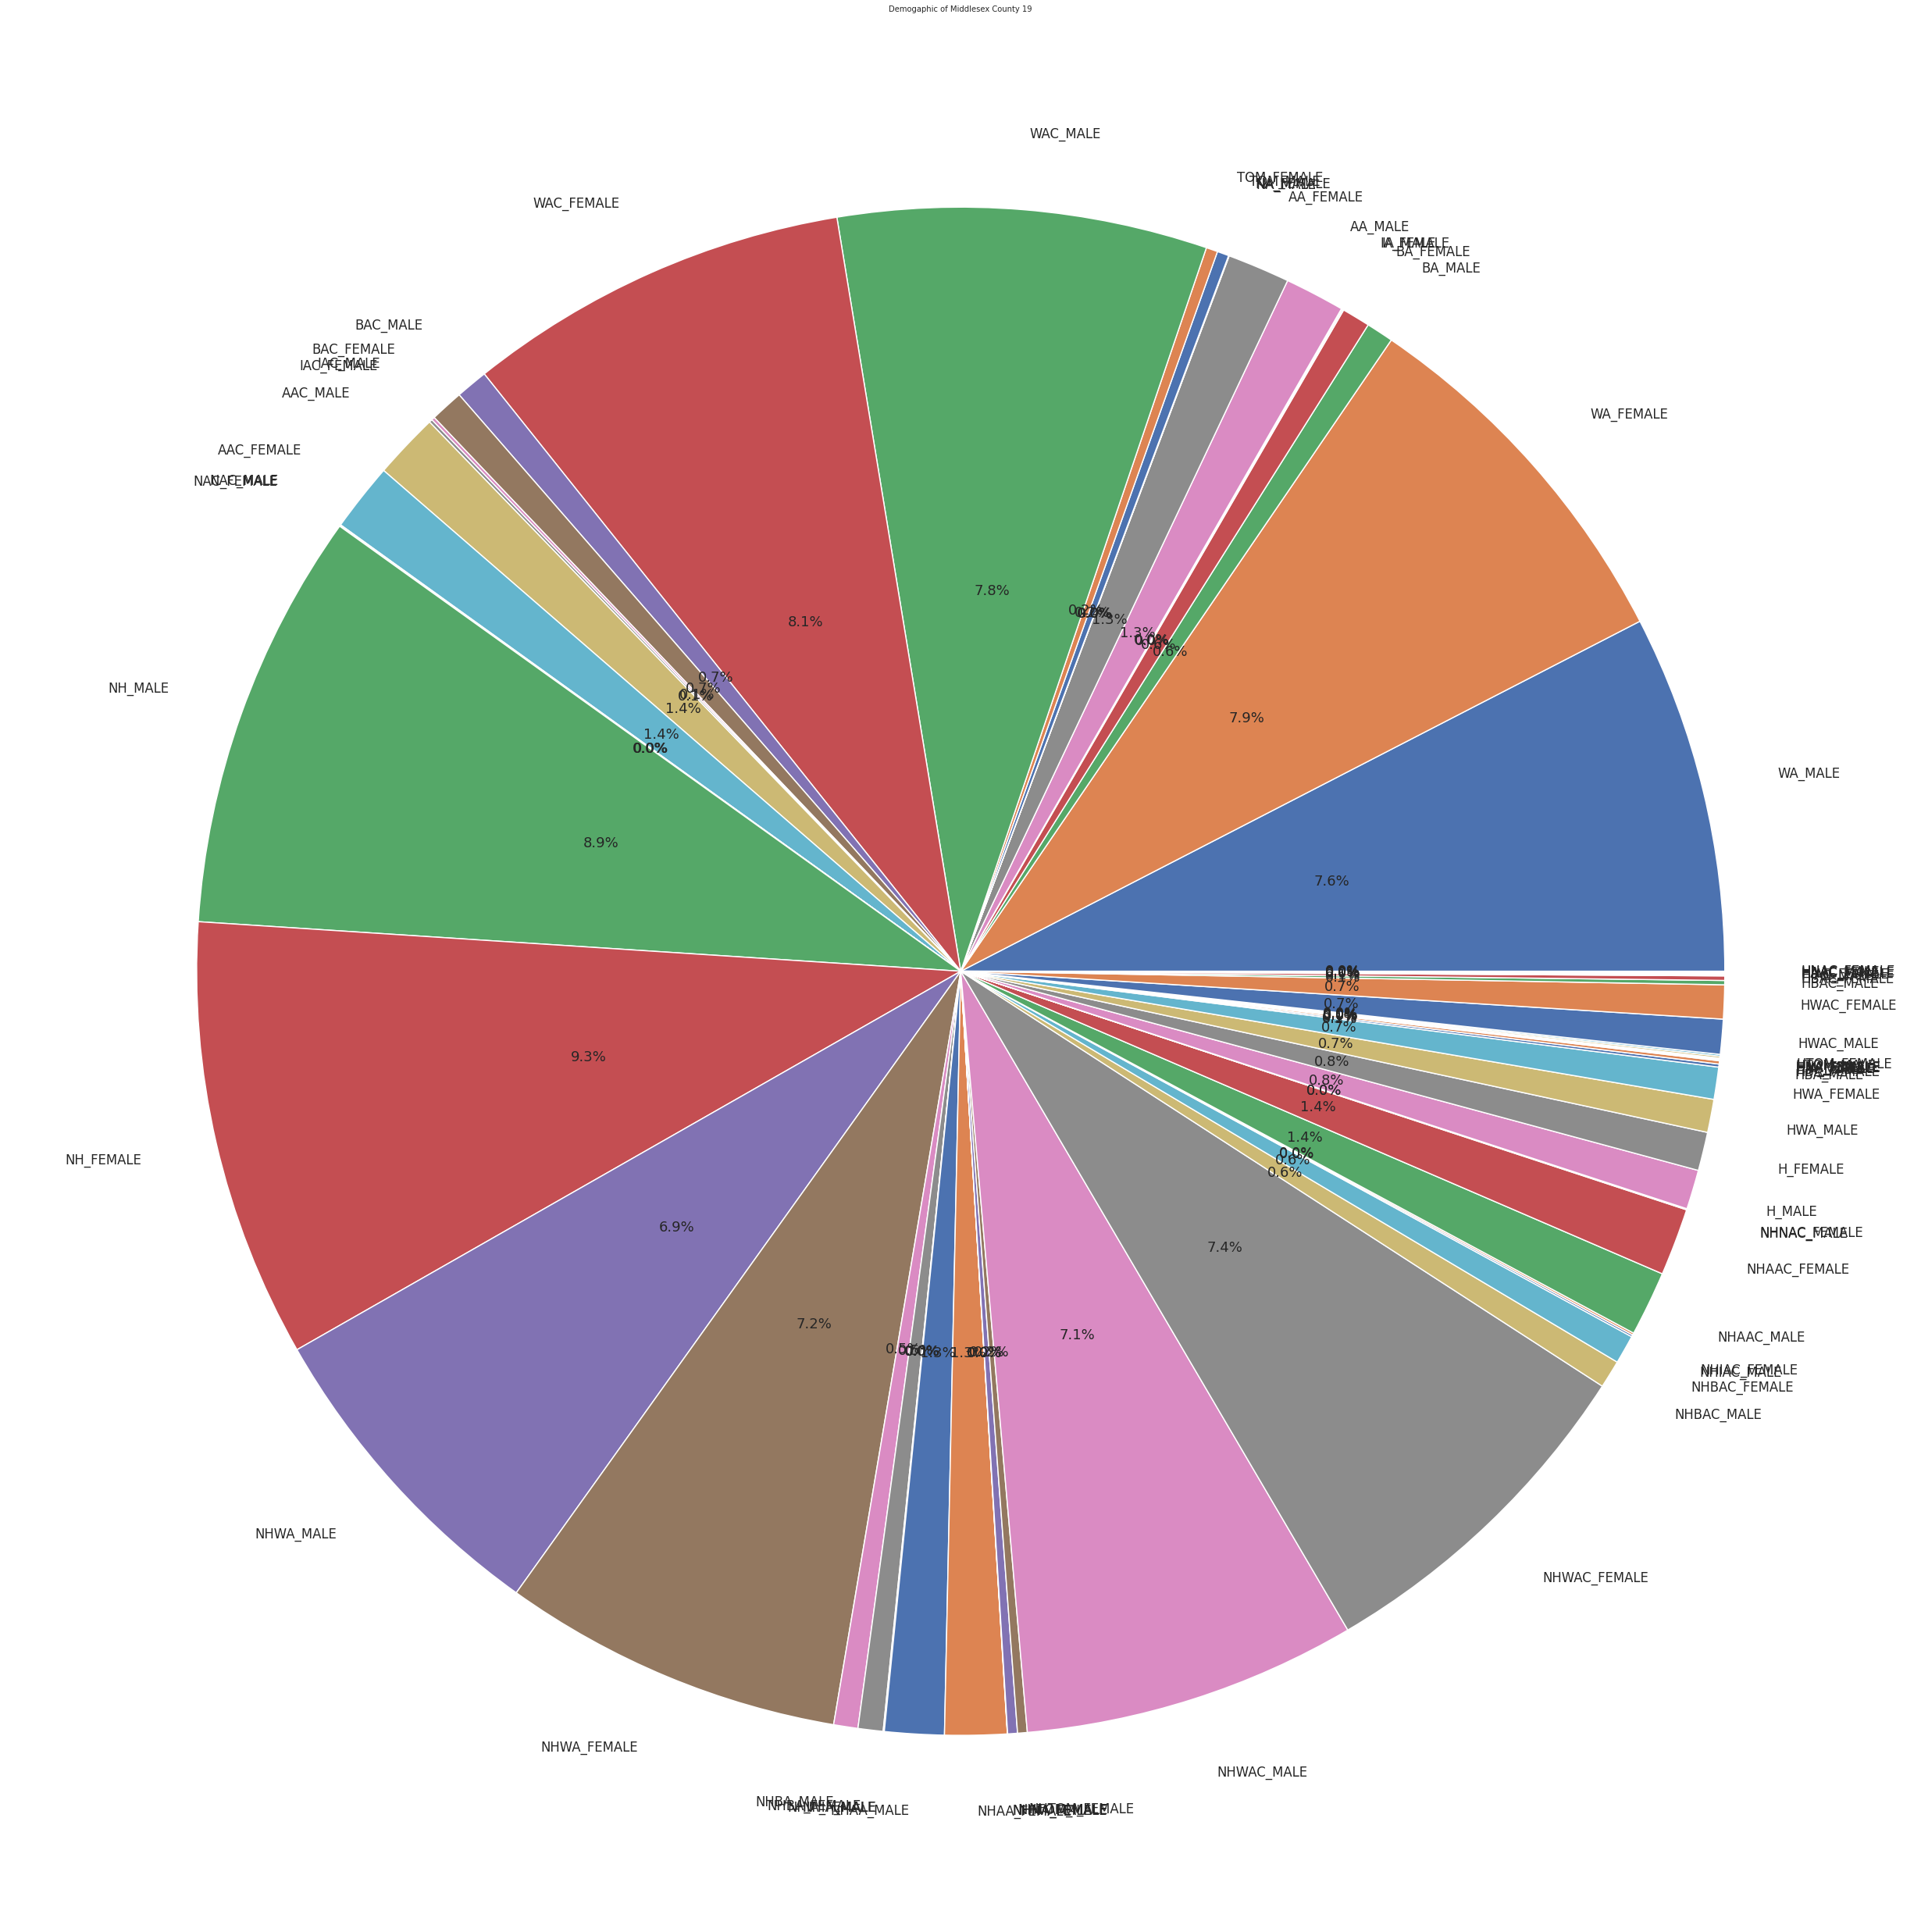

In [218]:
# make a pie chart of a county middlesex
midsex19 = mass_dem.loc[mass_dem.CTYNAME == 'Middlesex County'].iloc[2:, 10:]
data = midsex19.iloc[0, :]
pie, ax = plt.subplots(figsize=[45,45])
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%", labels=data.index, pctdistance=0.5)
plt.title("Demogaphic of Middlesex County 19", fontsize=10);

In [219]:
# make a foreign key and combine the data
# think of doing percentage/ratio by a county rather than a number

array([<AxesSubplot:ylabel='279509'>], dtype=object)

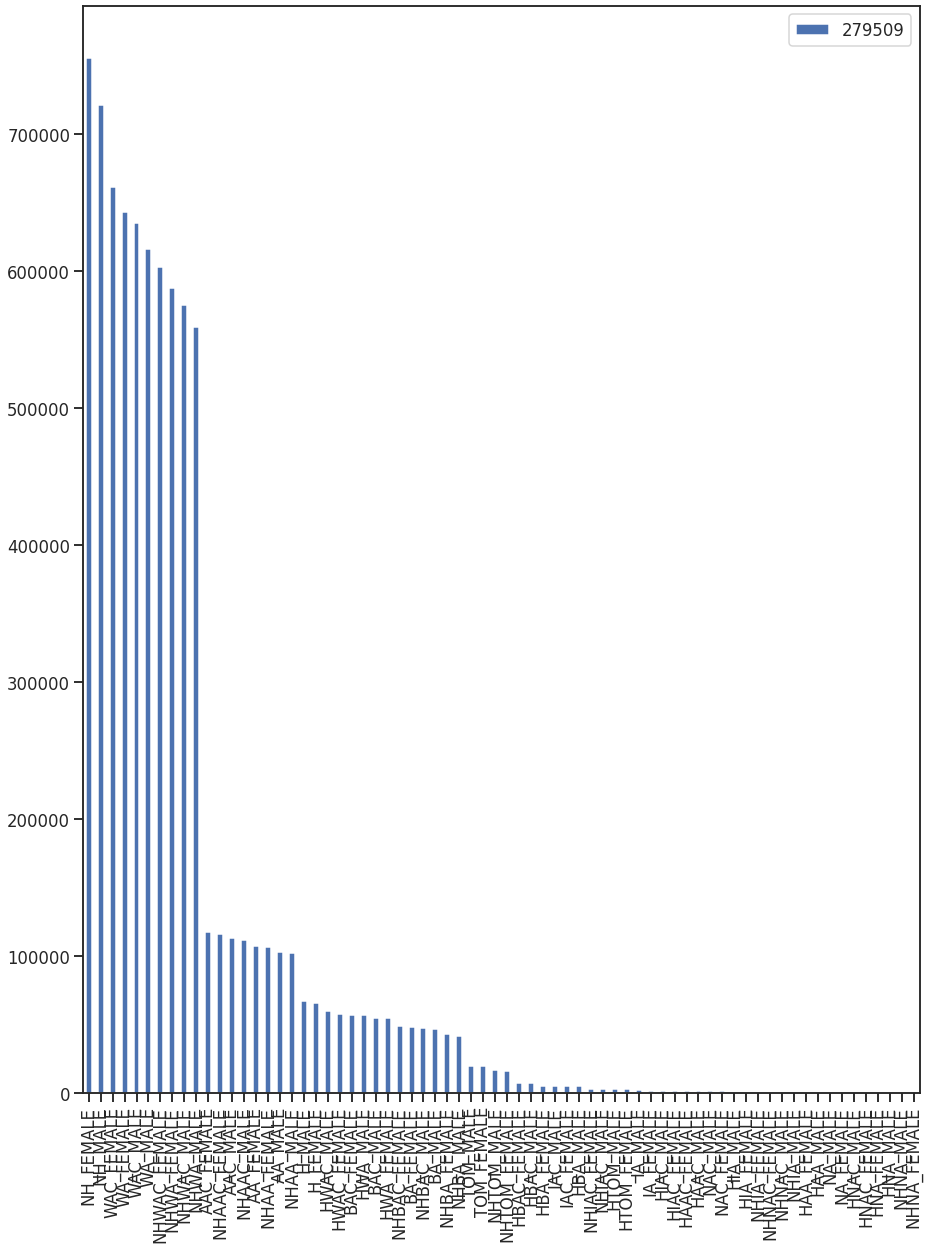

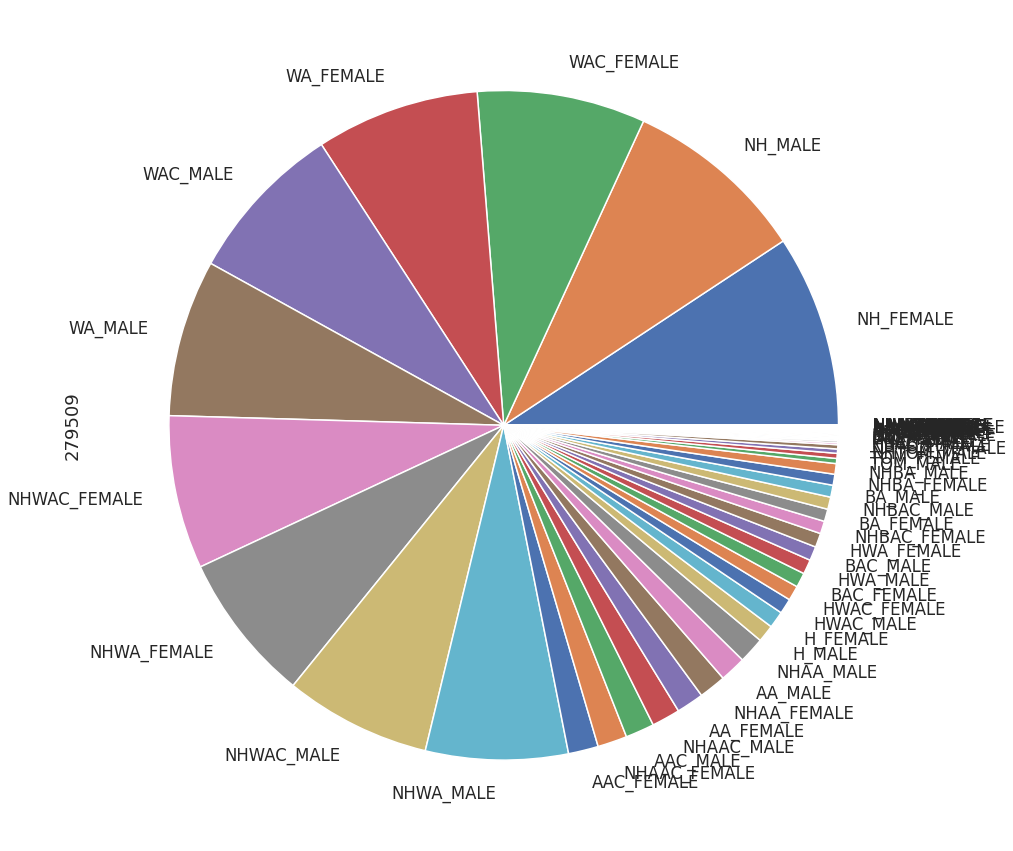

In [220]:


midsex19_t = midsex19.T
# midsex19_t['midsex19 col'] = midsex19_t[279509]
midsex19_t.sort_values(279509, ascending=False, inplace=True)
midsex19_t.plot(kind='bar', figsize=(15,20))
midsex19_t.plot(kind='pie', figsize=(15,20), subplots=True, legend=False)

In [221]:
# make one of BA BAC only

afro = mass_dem.columns.str.contains('B')
mass_afro = mass_dem.loc[:, afro]
mass_afro['CTYNAME'] = mass_dem.CTYNAME
mass_afro = remove_col(mass_afro, ['NHBA_MALE', 'NHBA_FEMALE', 'NHBAC_FEMALE', 'NHBAC_MALE'])
mass_afro.columns

<ipython-input-221-a1aff78a8658>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mass_afro['CTYNAME'] = mass_dem.CTYNAME


Index(['BA_MALE', 'BA_FEMALE', 'BAC_MALE', 'BAC_FEMALE', 'HBA_MALE',
       'HBA_FEMALE', 'HBAC_MALE', 'HBAC_FEMALE', 'CTYNAME'],
      dtype='object')

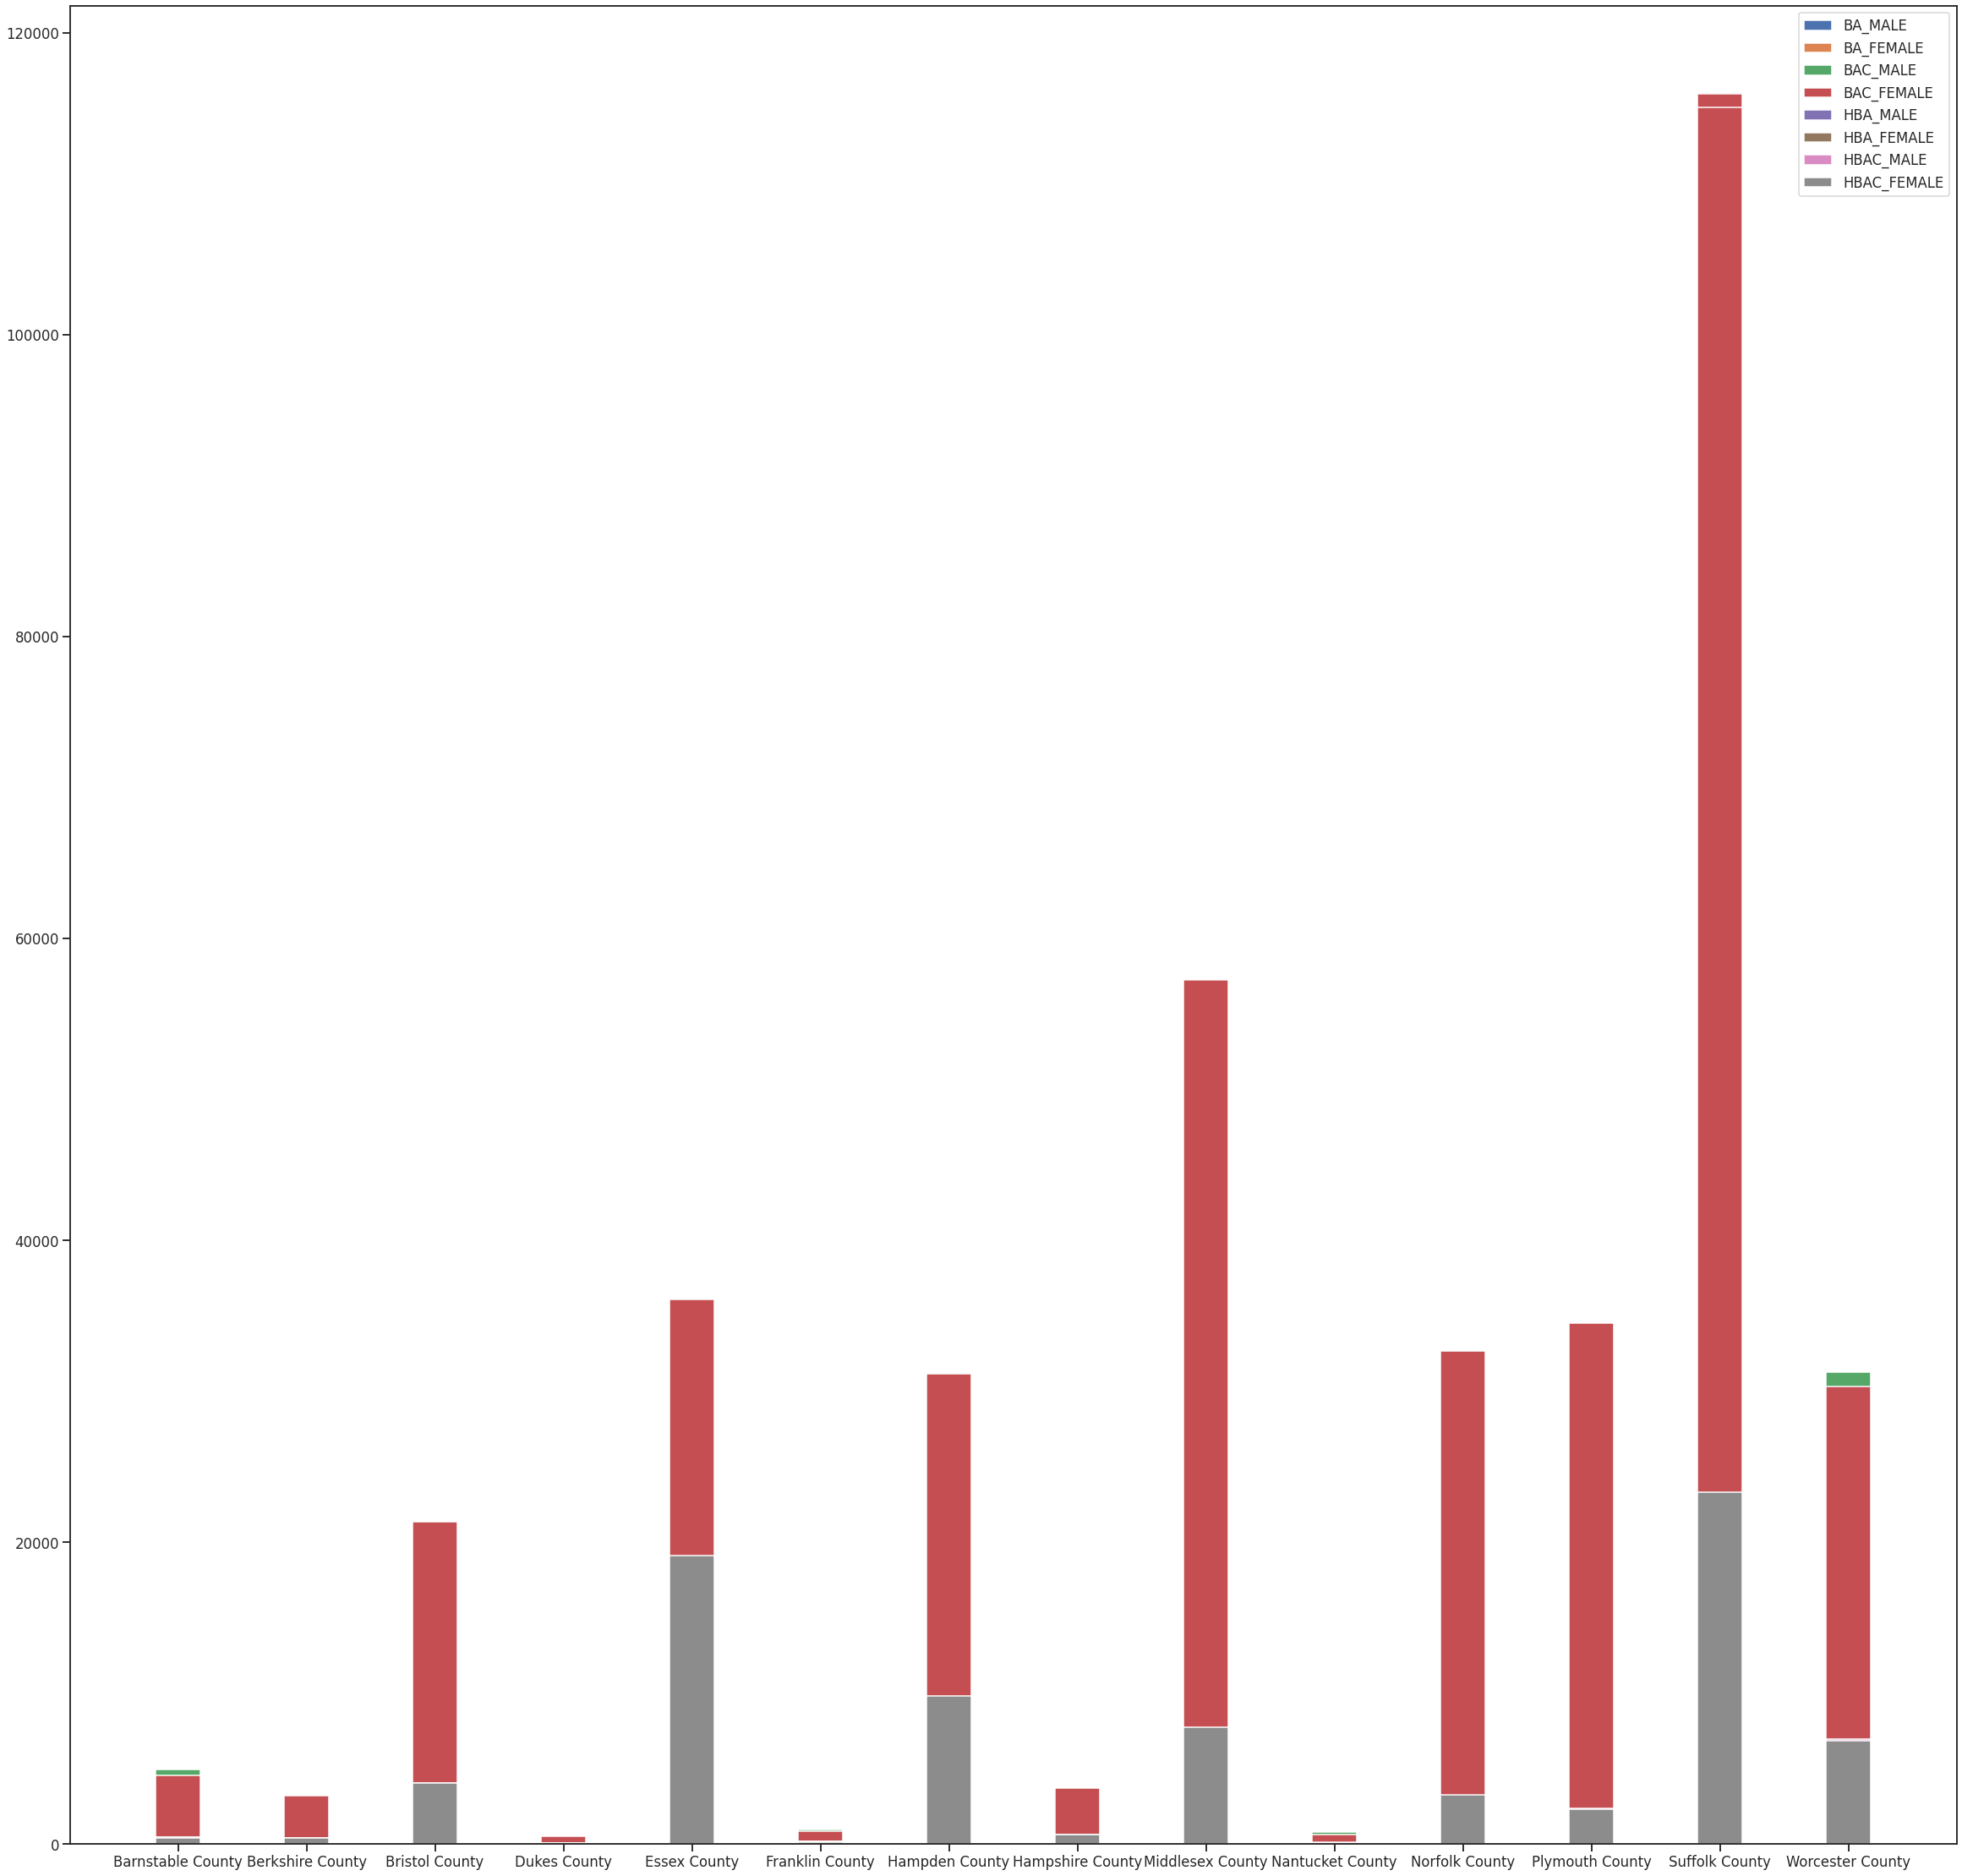

In [222]:
afro_ethn = mass_afro.columns.values[:-1]
fig, ax = plt.subplots(figsize=(40,40))
for eth in afro_ethn:
    ax.bar(mass_afro.CTYNAME, mass_afro[eth], width, label=eth)

ax.legend()
plt.show()
# appears that counties with more famale Black or combin ethnicities have higher AQI on average
# this makes sense as black females have least power when looking at social classes

 Change demographic column into ratio per the county

In [223]:
# need to build ratios and filter out duplicate ethnicities; such as the nots and in combinations or alones
mass_dem
# make 3 df yr2017, yr2018, yr2019


# mass_dem
# mass_dem['test'] = mass_dem.TOT_MALE / mass_dem.TOT_POP * 100
# print(mass_dem.TOT_MALE)
# print(mass_dem.test)

demographic = mass_dem.columns.values[8:]
mass_dem_ratio = mass_dem
# make ratios
for dem in demographic:
    mass_dem_ratio[dem + '_ratio'] = mass_dem[dem] / mass_dem['TOT_POP'] * 100
    # print(dem + ' ratio')

In [225]:
mass_dem_ratio = remove_col(mass_dem_ratio, demographic)
mass_dem_ratio

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE_ratio,TOT_FEMALE_ratio,...,HWAC_MALE_ratio,HWAC_FEMALE_ratio,HBAC_MALE_ratio,HBAC_FEMALE_ratio,HIAC_MALE_ratio,HIAC_FEMALE_ratio,HAAC_MALE_ratio,HAAC_FEMALE_ratio,HNAC_MALE_ratio,HNAC_FEMALE_ratio
277647,50,25,1,Massachusetts,Barnstable County,10,0,213581,47.826352,52.173648,...,1.346562,1.271649,0.199924,0.168086,0.093641,0.085214,0.079595,0.019665,0.018260,0.011705
277666,50,25,1,Massachusetts,Barnstable County,11,0,213471,47.796656,52.203344,...,1.399253,1.342571,0.205649,0.174263,0.093690,0.088537,0.101185,0.021549,0.018269,0.012180
277685,50,25,1,Massachusetts,Barnstable County,12,0,212990,47.791446,52.208554,...,1.450303,1.393023,0.216912,0.184985,0.089676,0.087798,0.115498,0.023945,0.018780,0.014085
277875,50,25,3,Massachusetts,Berkshire County,10,0,126353,48.295648,51.704352,...,2.083053,2.018155,0.309451,0.303119,0.121089,0.092598,0.025326,0.036406,0.018203,0.018203
277894,50,25,3,Massachusetts,Berkshire County,11,0,125901,48.310974,51.689026,...,2.213644,2.121508,0.323270,0.308179,0.119936,0.104050,0.027005,0.035742,0.020651,0.021445
277913,50,25,3,Massachusetts,Berkshire County,12,0,124944,48.346459,51.653541,...,2.325042,2.172973,0.335350,0.320944,0.120054,0.106448,0.032014,0.040018,0.021610,0.019209
278103,50,25,5,Massachusetts,Bristol County,10,0,560941,48.436823,51.563177,...,3.221016,3.222264,0.664241,0.671728,0.285770,0.221414,0.054195,0.051342,0.048668,0.043677
278122,50,25,5,Massachusetts,Bristol County,11,0,564092,48.392638,51.607362,...,3.376400,3.385086,0.702190,0.703786,0.286478,0.227622,0.056197,0.054069,0.048574,0.048042
278141,50,25,5,Massachusetts,Bristol County,12,0,565217,48.375403,51.624597,...,3.455487,3.472825,0.717777,0.720254,0.289446,0.234600,0.060508,0.055023,0.051485,0.050246
278331,50,25,7,Massachusetts,Dukes County,10,0,17311,49.026630,50.973370,...,1.536595,1.473052,0.277280,0.283057,0.075097,0.132863,0.034660,0.040437,0.017330,0.028883


In [228]:
mass_dem_ratio_17 = mass_dem_ratio.loc[mass_dem.YEAR == 10]
mass_dem_ratio_18 = mass_dem_ratio.loc[mass_dem.YEAR == 11]
mass_dem_ratio_19 = mass_dem_ratio.loc[mass_dem.YEAR == 12]

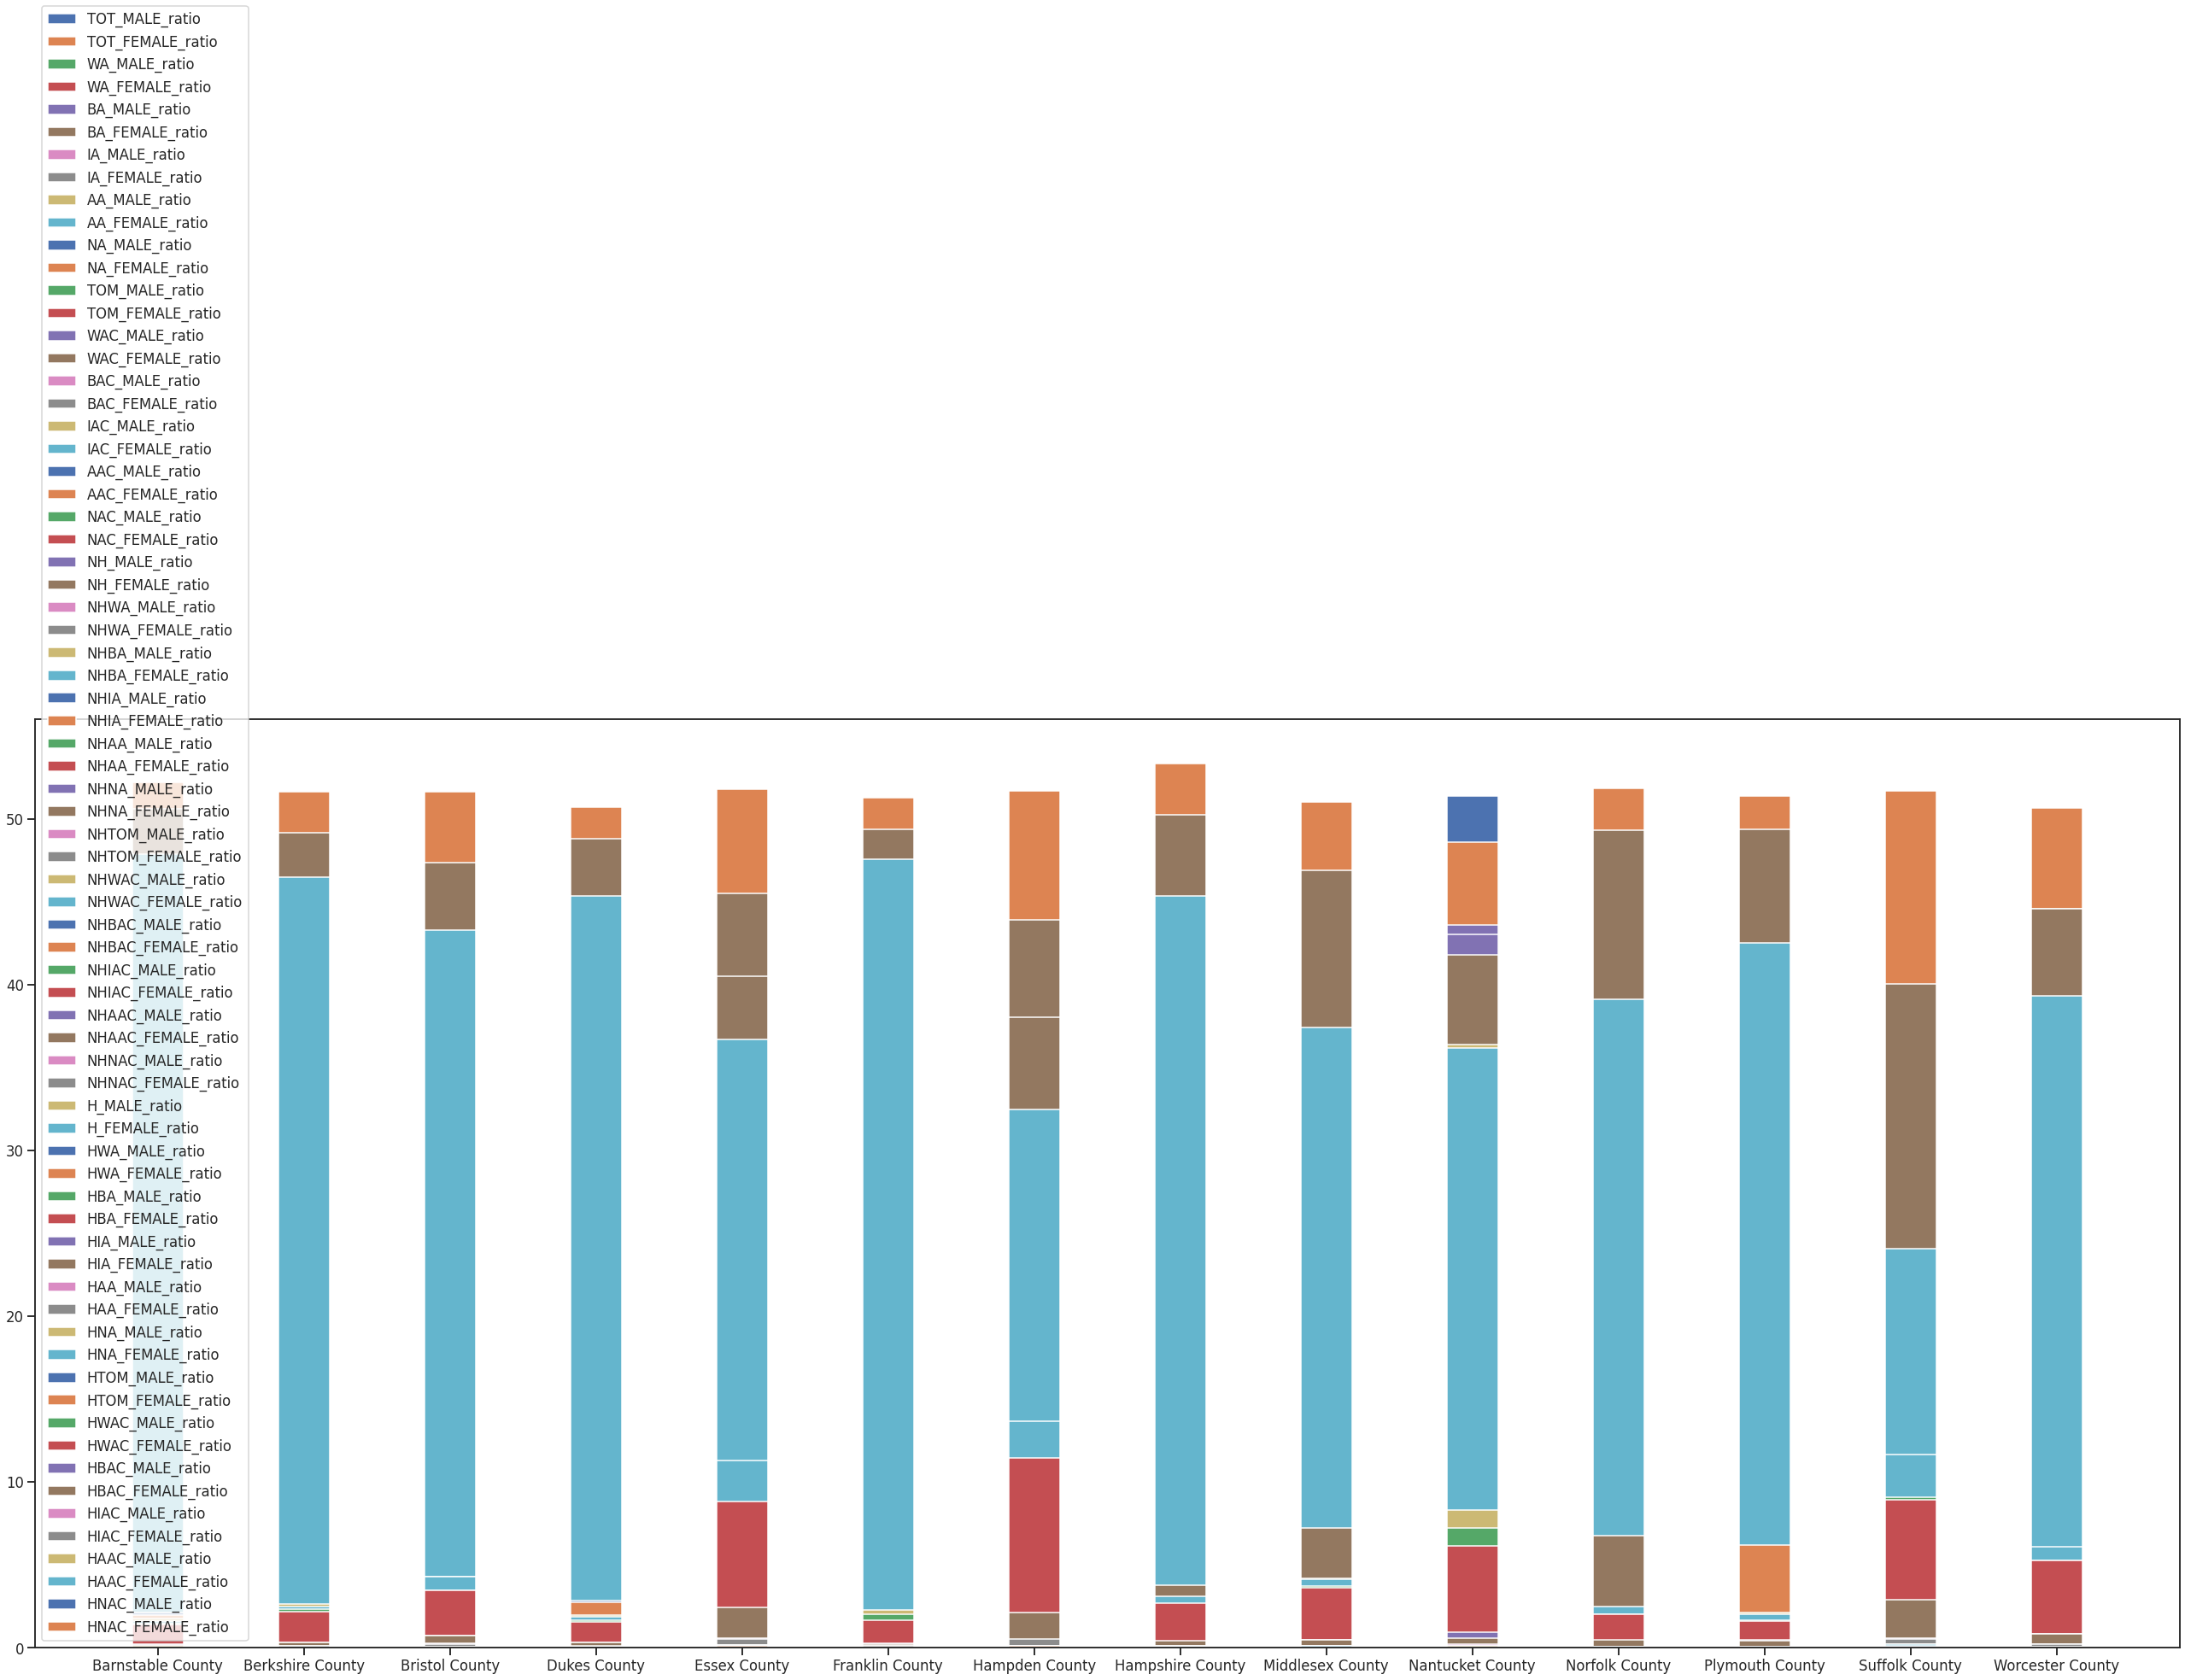

In [229]:
# make a bar chart of all demographs in county 19
demographic_ratios = mass_dem_ratio.columns.values[8:]

fig, ax = plt.subplots(figsize=(45,20))

# rec1 = ax.bar(mass_dem.CTYNAME, mass_dem.loc[:,'TOT_POP'], width, label='tot pop')
for dem in demographic_ratios:
    ax.bar(mass_dem_ratio_19.CTYNAME, mass_dem_ratio_19[dem], width, label=dem)

ax.legend()
plt.show()
# why are the bar charts not all equal
# maybe do them for every year